#  1. 产生tick日志

#####  编译最小main : 文件 mini_main.c
```cpp
//文件 mini_main.c
int main(int argc, char** argv){
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main.c
#生成tick日志文件:
#-rw-rw-r-- 32M  7月 30 22:17 clang-15_298040_1690726675727_1
```

#####  编译最小main+含错误的f1: 文件 mini_main_f1_err.c
```cpp
//文件 mini_main_f1_err.c
char* calc_name(float age, bool high, char* nick){
  if(high && age>5){
    return "child";
  }
  char name[32]={"bigPeople"};
  return name;
}
int main(int argc, char** argv){
	calc_name(10,false,"nick");
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main_f1_err.c
#生成tick日志文件:
#-rw-rw-r-- 27M  7月 30 23:02 clang-15_303915_1690729326061_1
```

#####  编译最小main+正确的f1: 文件 mini_main_f1_ok.c
```cpp
//文件 mini_main_f1_ok.c
char* calc_name(float age, short high, char* nick){
  if(high && age>5){
    return "child";
  }
  char name[32]={"bigPeople"};
  return name;
}
int main(int argc, char** argv){
	calc_name(10,0,"nick");
    return 0;
}
```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main_f1_ok.c
#生成tick日志文件:
#-rw-rw-r-- 37M  7月 30 23:20 clang-15_306264_1690730435172_1
```

#####  编译最小main+包含头文件User.h:  mini_main_include_user.c 
```cpp
//文件 mini_main_include_user.c 
#include "User.h"

// #include <stdio.h>
int main(int argc, char** argv){
    int user_id_tomcat=-1,user_id_kate=-1,user_id_john=-1;
    short reg_result_tomcat= register_user("tomcat", 6, "123",4,  &user_id_tomcat);
    short reg_result_kate= register_user("Kate", 5, "secret",7,  &user_id_kate);
    short reg_result_john= register_user("john", 5, "0000",5,  &user_id_john);
    
    // printf("user_id_tomcat=%d\n",user_id_tomcat);
    // printf("user_id_kate=%d\n",user_id_kate);
    // printf("user_id_john=%d\n",user_id_john);
    // printf("next_user_id=%d\n",next_user_id);
    return 0;
}

```

```bash
tick_save=true /pubx/build-llvm15/bin/clang-15 -c mini_main_include_user.c 
#生成tick日志文件:
#-rw-rw-r--  47M  7月 31 16:56 clang-15_11363_1690793809353_1

```

# 2. 加载tick日志

In [1]:
# %config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc={'figure.figsize': (30,20)}

In [2]:
import numpy 
import math

In [3]:
import seaborn

In [4]:
import plotly.offline as plotly_offline
plotly_offline.init_notebook_mode(connected=True)          
import plotly.graph_objs as graph_objs                
import plotly.figure_factory as figure_factory 

from plotly.graph_objs import Scatter, Figure, Scatter3d

import matplotlib.pyplot



In [5]:
import pandas
# pandas.options.display.max_columns = None
# pandas.options.display.max_rows = None

In [6]:
%%bash
ls -lhrt /tick_data_home/

总计 415M
-rw-rw-r-- 1 zz zz  20M  7月 27 16:42 clang-15_252255_1690447364166_1
-rw-rw-r-- 1 zz zz  17M  7月 27 17:54 clang-15_268265_1690451684154_1
-rw-rw-r-- 1 zz zz  23M  7月 27 18:35 clang-15_272726_1690454100567_1
-rw-rw-r-- 1 zz zz  19M  7月 27 19:08 clang-15_279683_1690456088122_1
-rw-rw-r-- 1 zz zz 5.0M  7月 27 19:08 clang-15_279682_1690456088057_1
-rw-rw-r-- 1 zz zz  22M  7月 27 19:08 clang-15_279758_1690456131168_1
-rw-rw-r-- 1 zz zz 5.0M  7月 27 19:08 clang-15_279757_1690456131110_1
-rw-rw-r-- 1 zz zz  66M  7月 27 19:40 clang-15_284358_1690458014273_1
-rw-rw-r-- 1 zz zz  20M  7月 29 23:18 clang-15_320593_1690643890944_1
-rw-rw-r-- 1 zz zz  18M  7月 29 23:45 clang-15_406251_1690645502530_1
-rw-rw-r-- 1 zz zz  32M  7月 30 22:15 clang-15_297928_1690726545091_1
-rw-rw-r-- 1 zz zz  32M  7月 30 22:17 clang-15_297999_1690726628322_1
-rw-rw-r-- 1 zz zz  32M  7月 30 22:17 clang-15_298040_1690726675727_1
-rw-rw-r-- 1 zz zz  27M  7月 30 23:02 clang-15_303915_1690729326061_1
-rw-rw-r-- 1 zz zz  37M  7

In [7]:
#编译正常: mini_main.c
df_mini_main=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_298040_1690726675727_1",sep=',')

#编译错误: mini_main_f1_err.c
df_mini_main_f1_err=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_303915_1690729326061_1",sep=',')

# #编译正常: mini_main_f1_ok.c
df_mini_main_f1_ok=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_306264_1690730435172_1",sep=',')

# 编译正常: mini_main_include_user.c
df_mini_main_include_user=pandas.read_csv(filepath_or_buffer="/tick_data_home/clang-15_11363_1690793809353_1",sep=',')

In [8]:
df_mini_main.tail()

,滴答,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净
845796,740380,1,0,0,0,239861,218336,21525,0,0,0
845797,740381,0,0,0,0,239861,218336,21525,0,0,0
845798,740381,0,1,0,0,239861,218337,21524,0,0,0
845799,740381,0,0,0,0,239861,218337,21524,0,0,0
845800,740132,0,0,0,0,239860,218336,21524,0,0,0


In [9]:
df_mini_main_f1_err.tail()

,滴答,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净
720517,621641,1,0,0,0,228609,192529,36080,0,0,0
720518,621642,0,0,0,0,228609,192529,36080,0,0,0
720519,621642,0,1,0,0,228609,192530,36079,0,0,0
720520,621642,0,0,0,0,228609,192530,36079,0,0,0
720521,621393,0,0,0,0,228608,192529,36079,0,0,0


In [10]:
df_mini_main_f1_ok.tail()

,滴答,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净
979366,849788,1,0,0,0,272366,246714,25652,0,0,0
979367,849789,0,0,0,0,272366,246714,25652,0,0,0
979368,849789,0,1,0,0,272366,246715,25651,0,0,0
979369,849789,0,0,0,0,272366,246715,25651,0,0,0
979370,849540,0,0,0,0,272365,246714,25651,0,0,0


In [11]:
df_mini_main_include_user.tail()

,滴答,d栈生,d栈死,d堆生,d堆死,栈生,栈死,栈净,堆生,堆死,堆净
1227323,1056906,1,0,0,0,334570,298442,36128,0,0,0
1227324,1056907,0,0,0,0,334570,298442,36128,0,0,0
1227325,1056907,0,1,0,0,334570,298443,36127,0,0,0
1227326,1056907,0,0,0,0,334570,298443,36127,0,0,0
1227327,1056658,0,0,0,0,334569,298442,36127,0,0,0


In [12]:
#df备份:
# df_mini_main_=df_mini_main
# df_mini_main_f1_err_=df_mini_main_f1_err
# df_mini_main_f1_ok_=df_mini_main_f1_ok


In [13]:

#tick日志特别的密集，这里间隔200个tick采样一次，方便输出观看，否则容易浏览器卡死 图出不来。
df_mini_main=df_mini_main[::200]  #pandas.Dataframe间隔200行采样1行
df_mini_main_f1_err=df_mini_main_f1_err[::200]  
df_mini_main_f1_ok=df_mini_main_f1_ok[::200]  
df_mini_main_include_user=df_mini_main_include_user[::200] 

# df5Full=df5
# #df5轨迹太长了，先只看一部分
# df5=df5[:len(df3)]

# 3.  单日志作图 (seaborn)
>  seaborn作图会留在 .ipynb文件内，网页上浏览代码仓库中 此 .ipynb文件 即可看到 seaborn图，方便。

In [14]:
#增大图例颜色圆球的尺寸
def inrease_g_size(g):
    for lh in g.legend_.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [500] 

In [15]:

import warnings
# 过滤掉RuntimeWarning警告
warnings.filterwarnings("ignore", category=RuntimeWarning)


##  1. mini_main.c作图

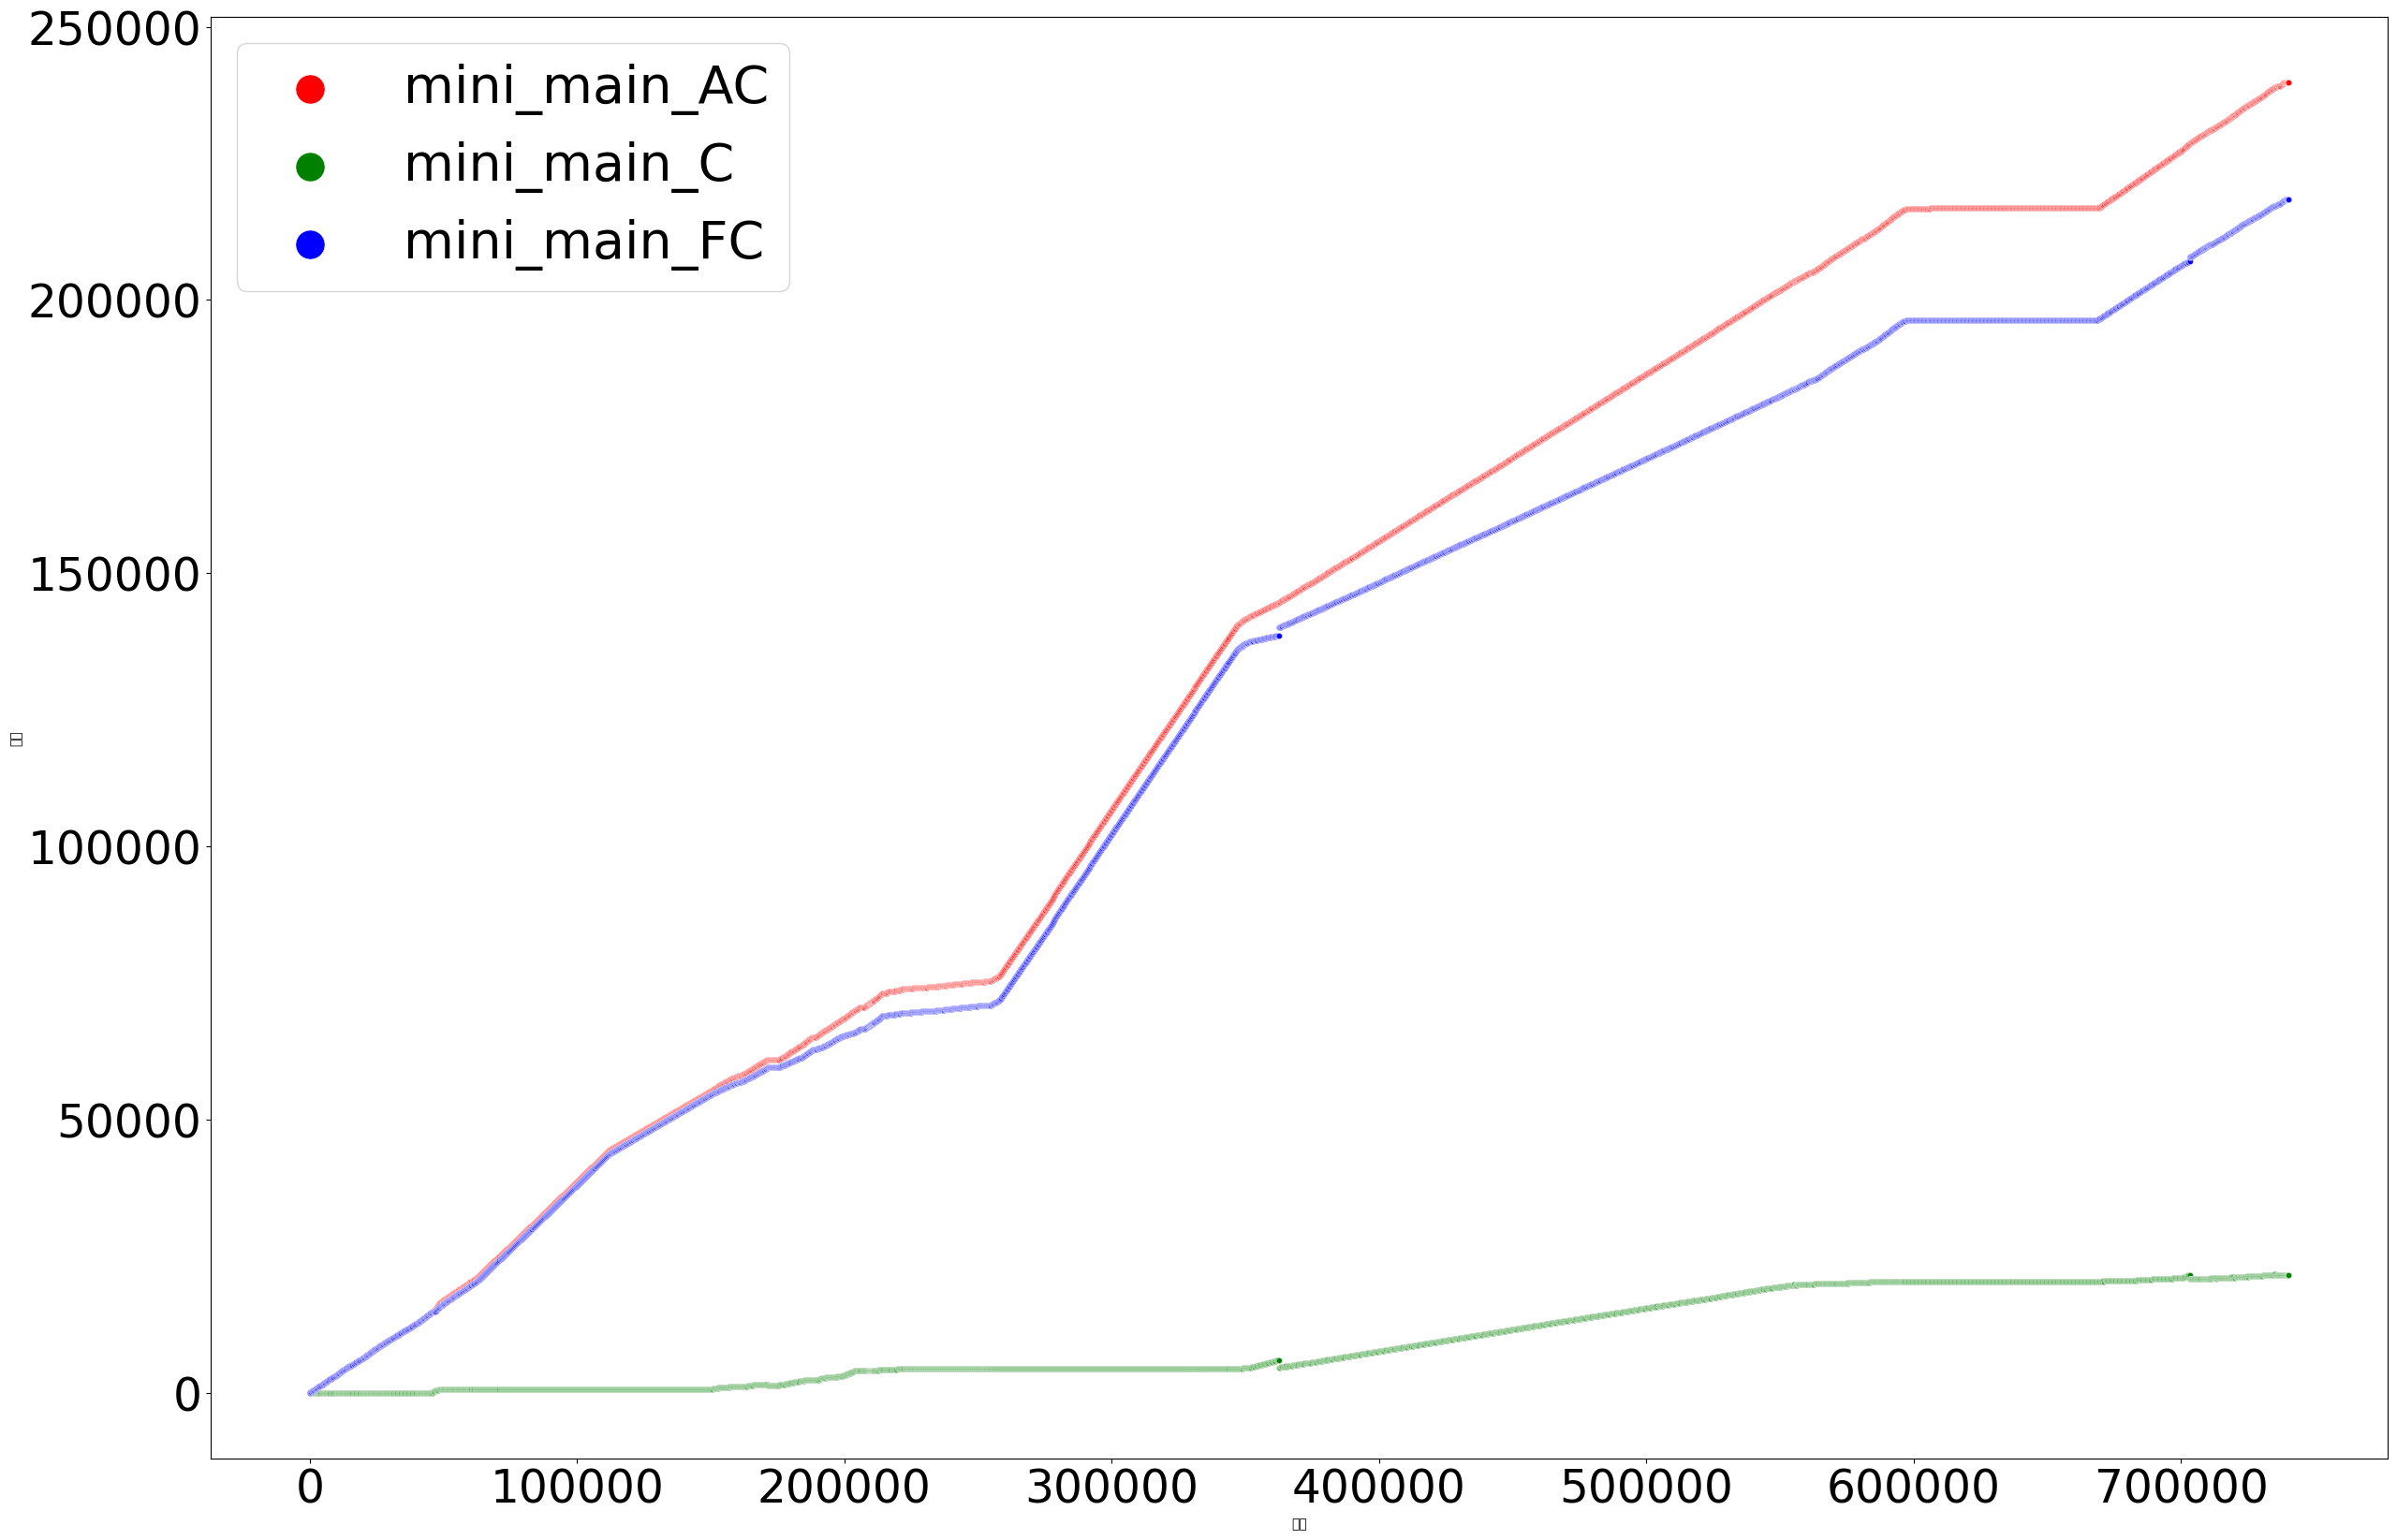

In [16]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_C',color='green',ax=ax)   
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_FC',color='blue',ax=ax)   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


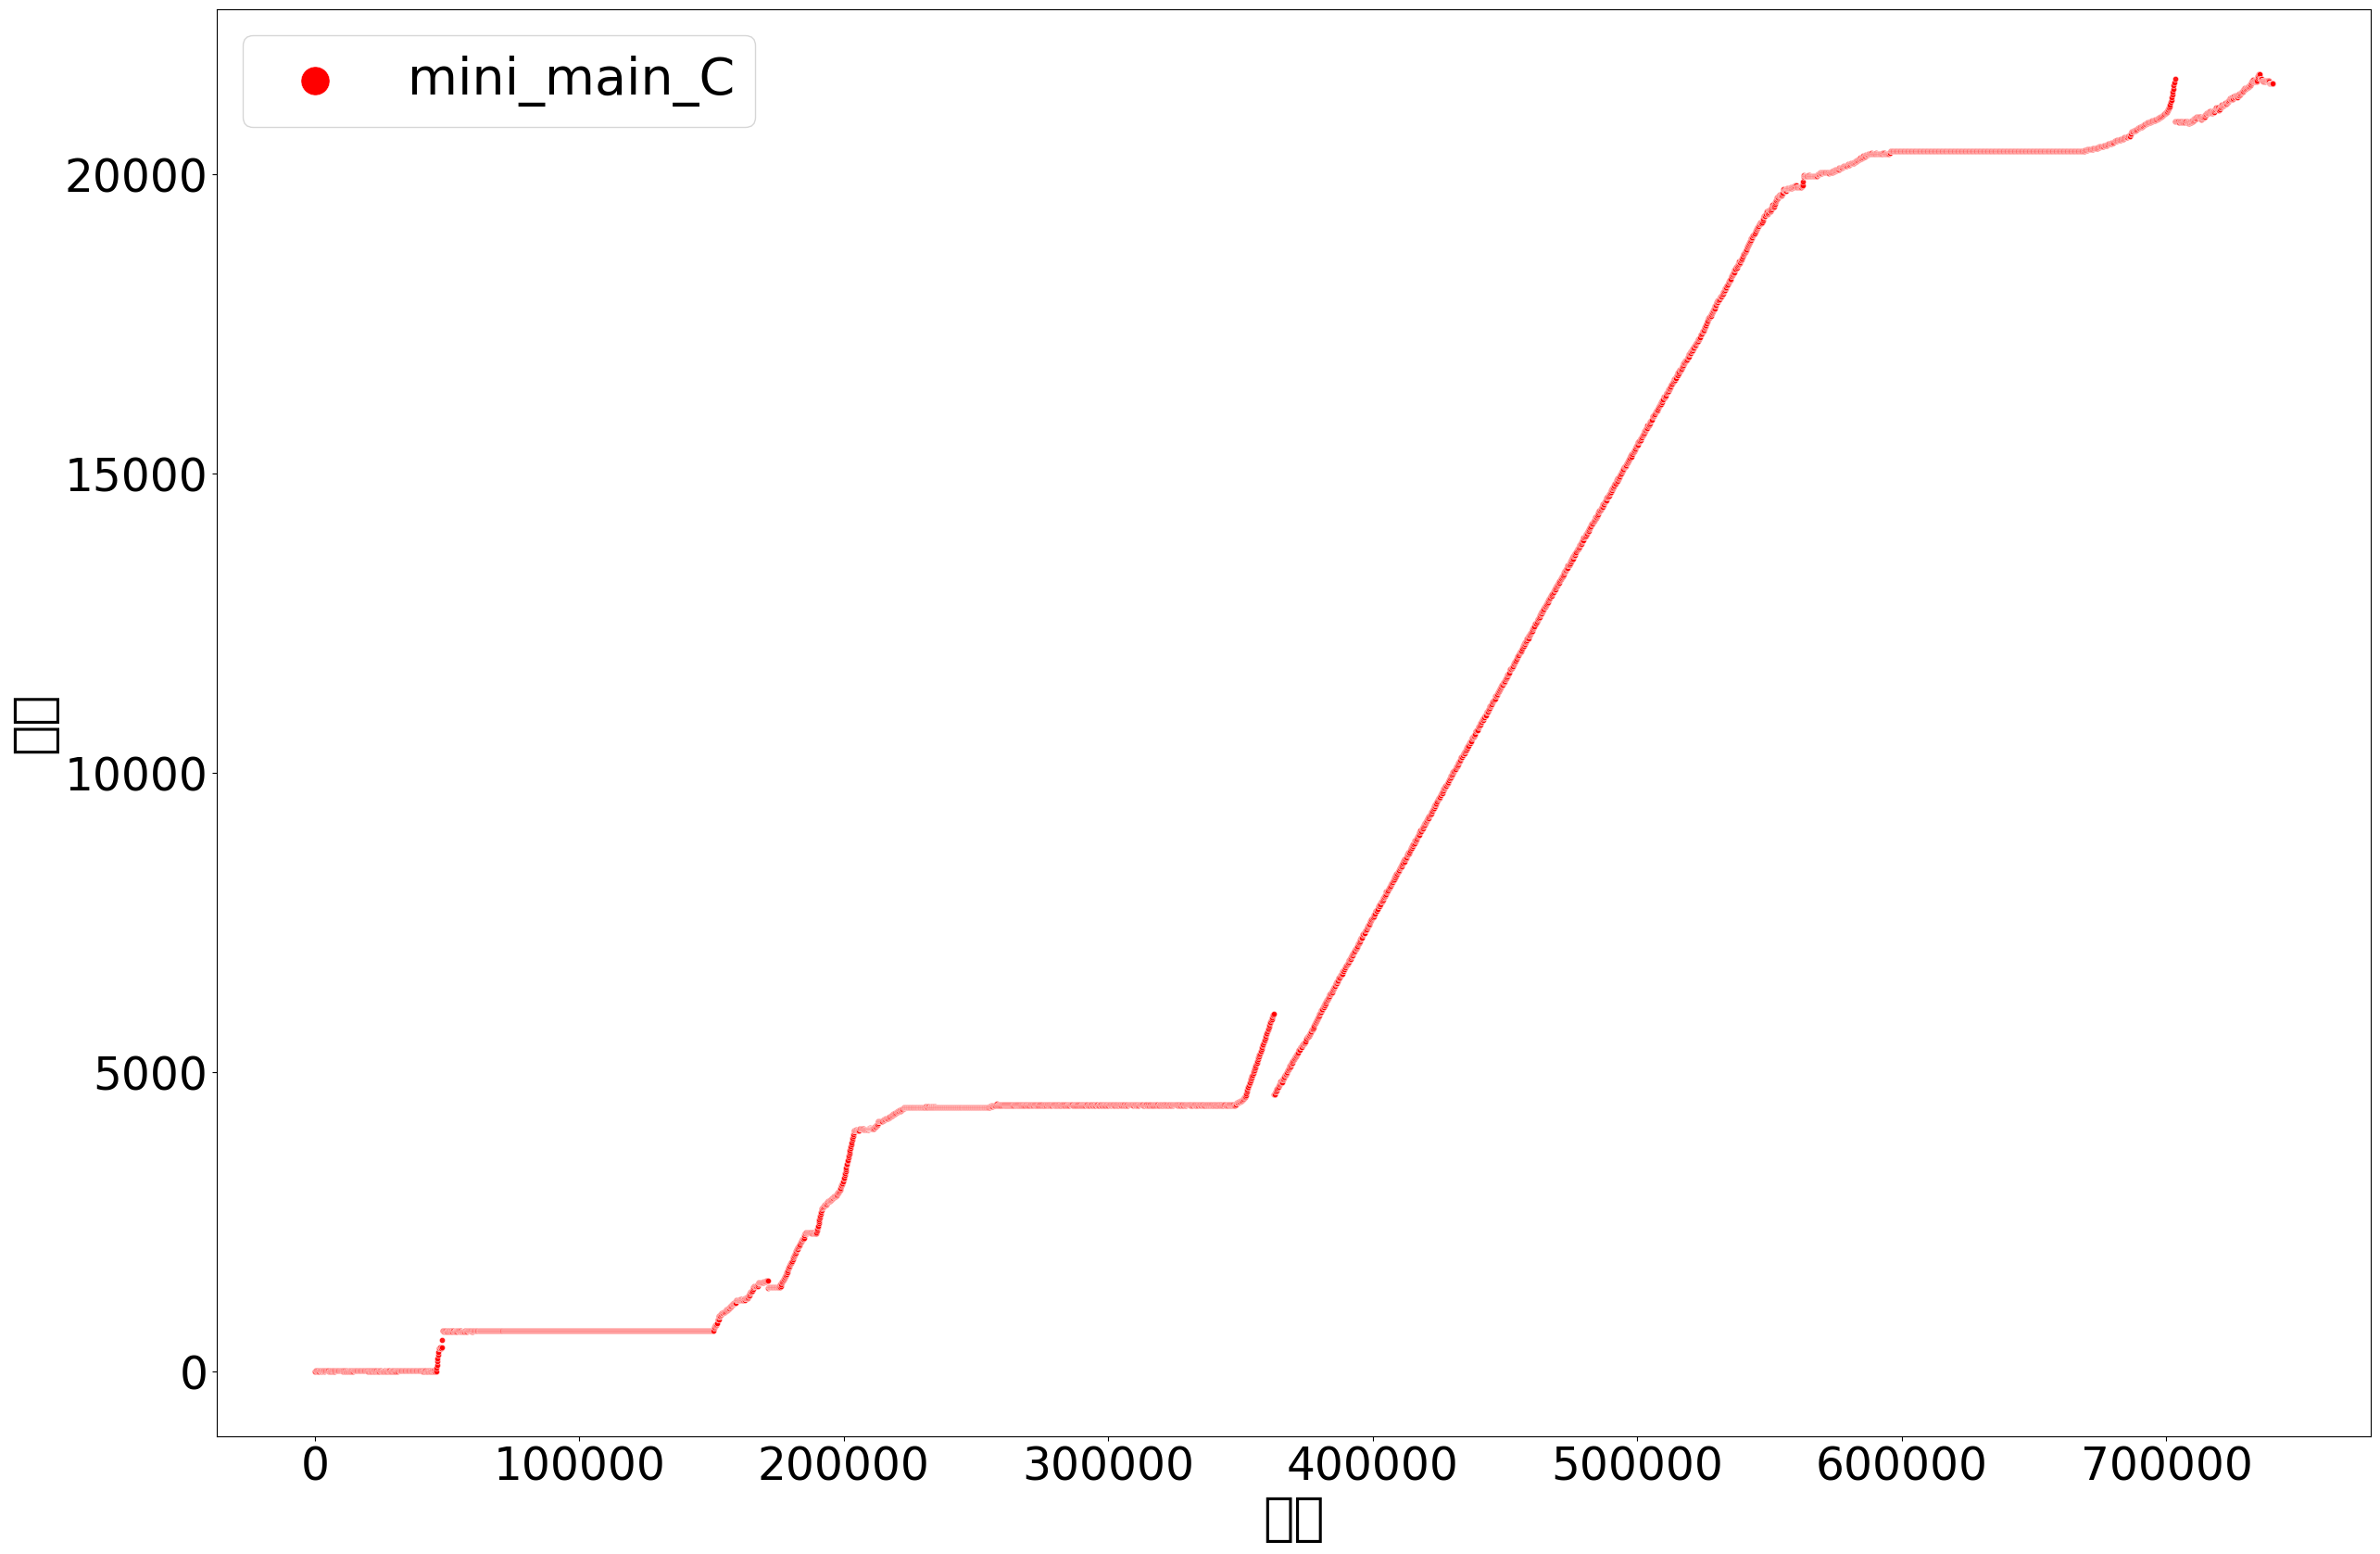

In [17]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_C',color='red',ax=ax)  

inrease_g_size(g1)


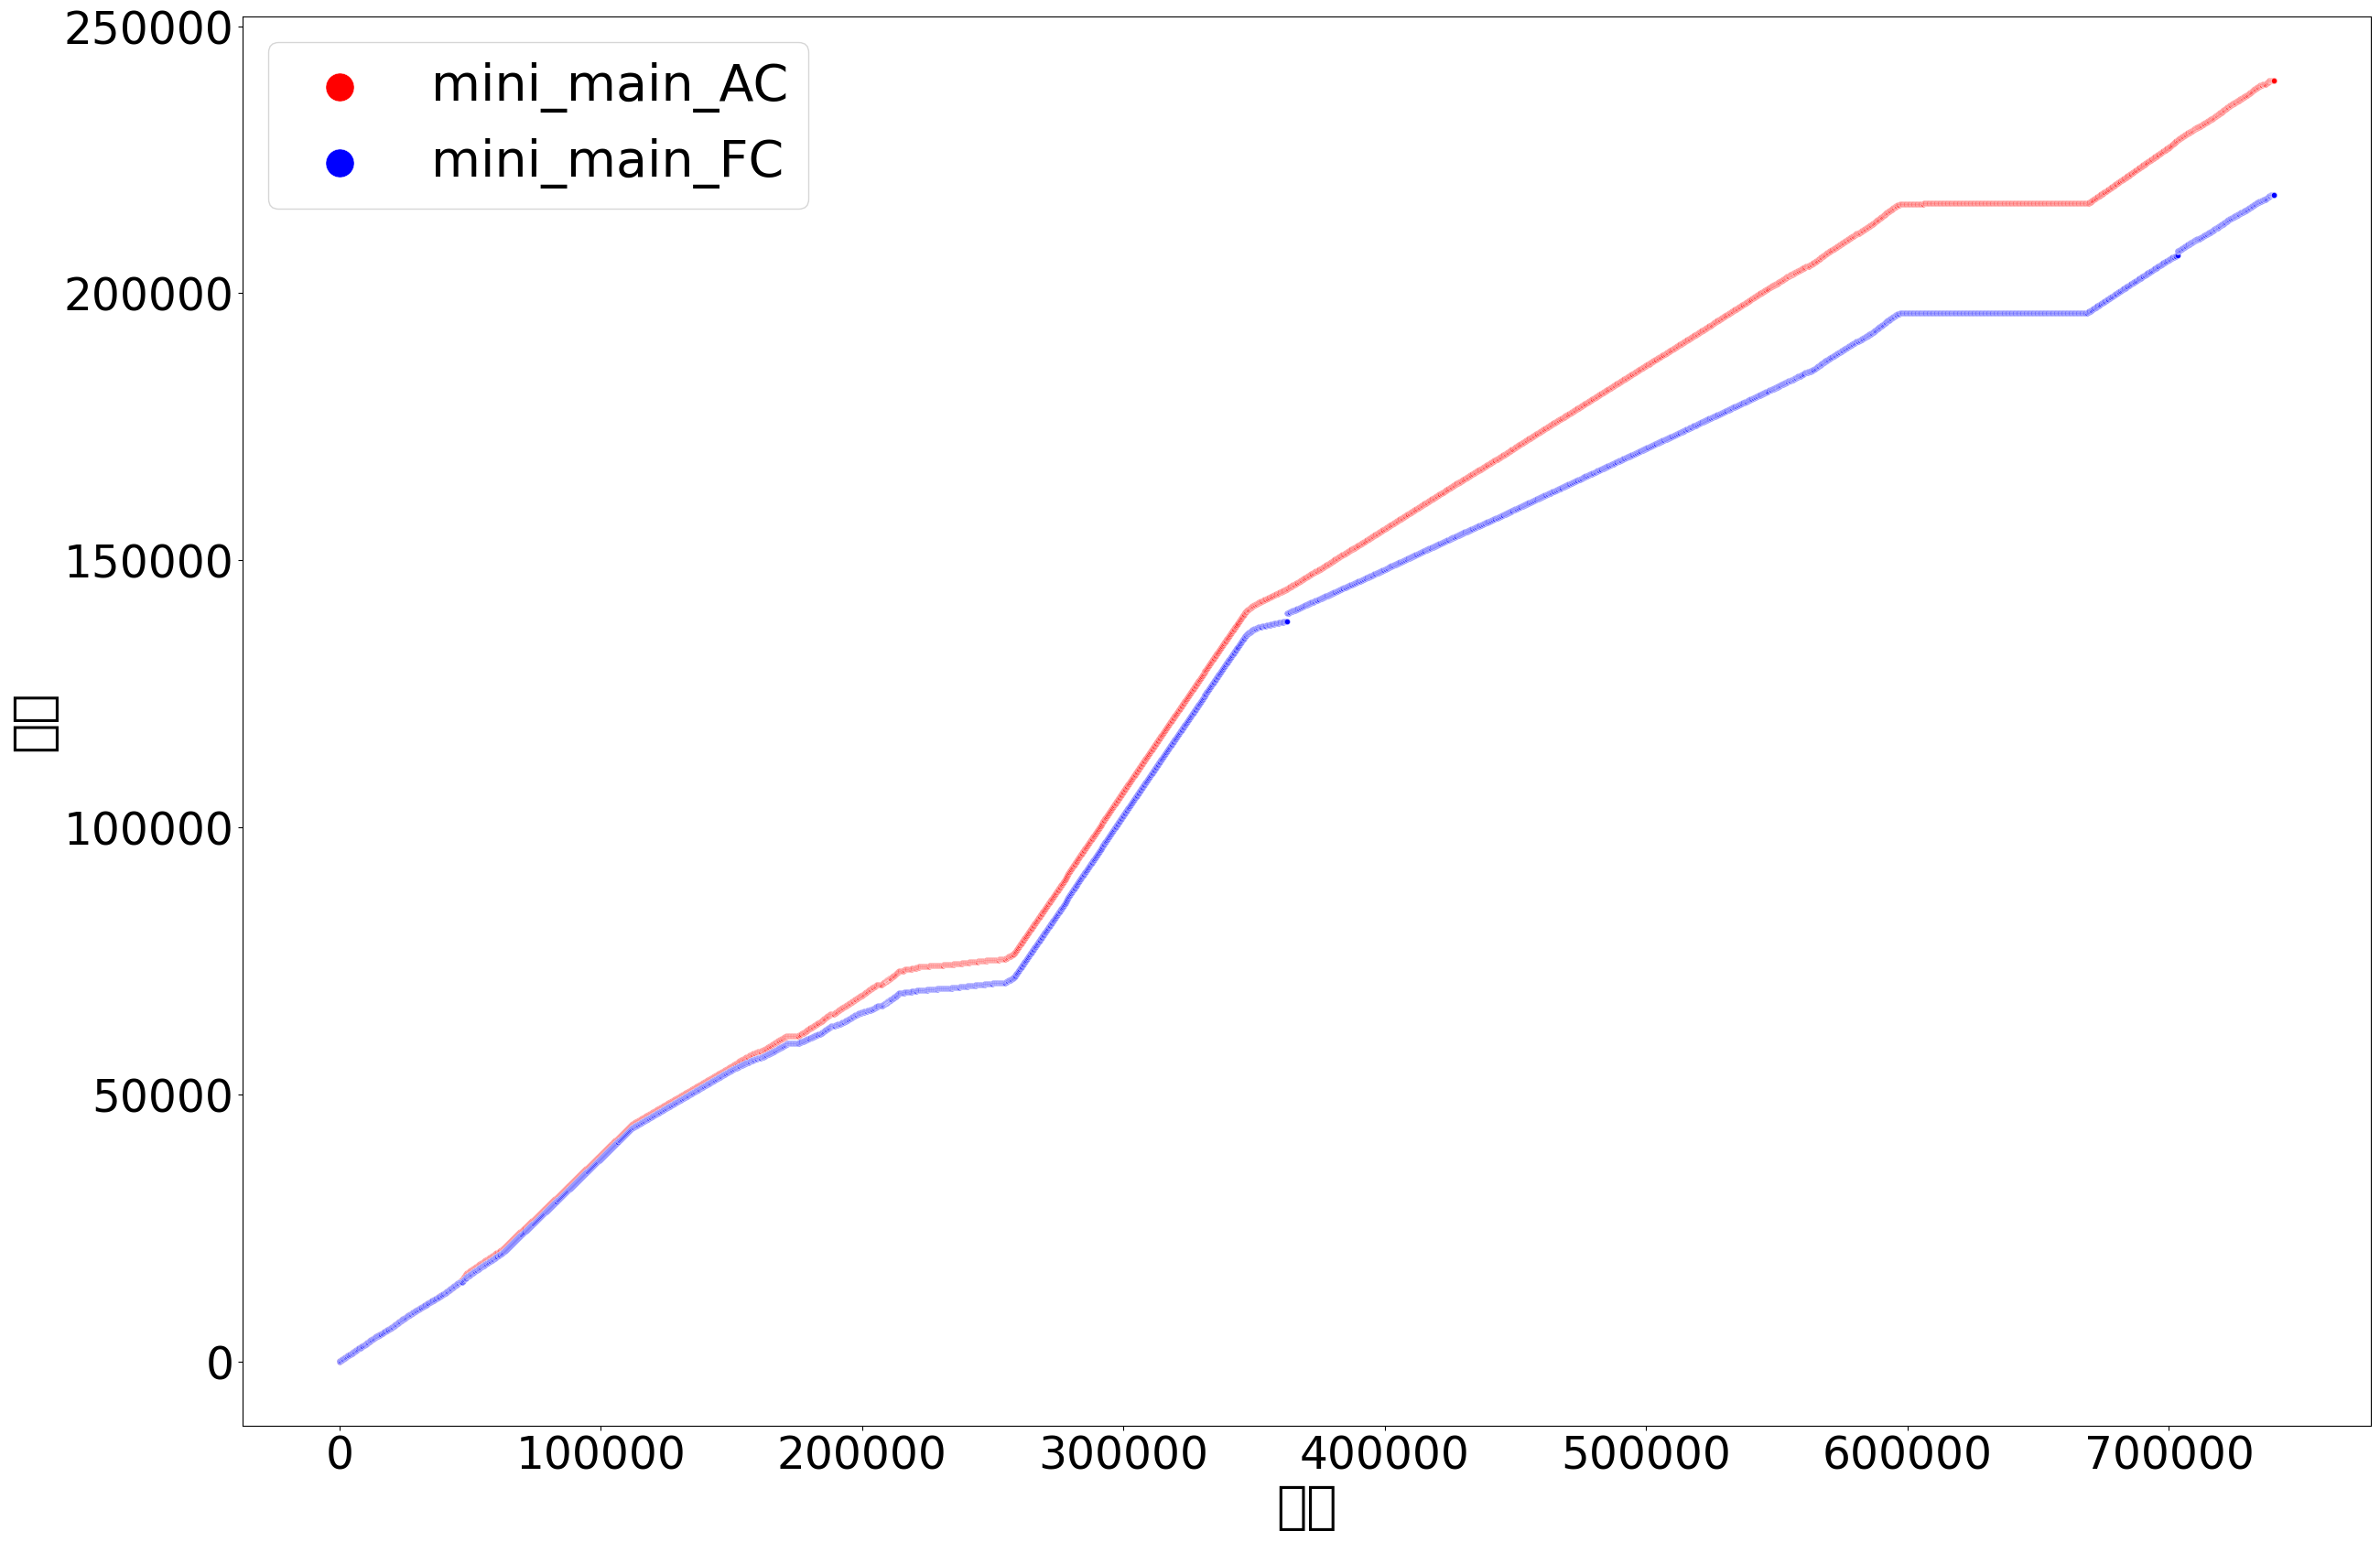

In [18]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_FC',color='blue',ax=ax)  

inrease_g_size(g1)
inrease_g_size(g2)


##  2. mini_main_f1_err.c作图

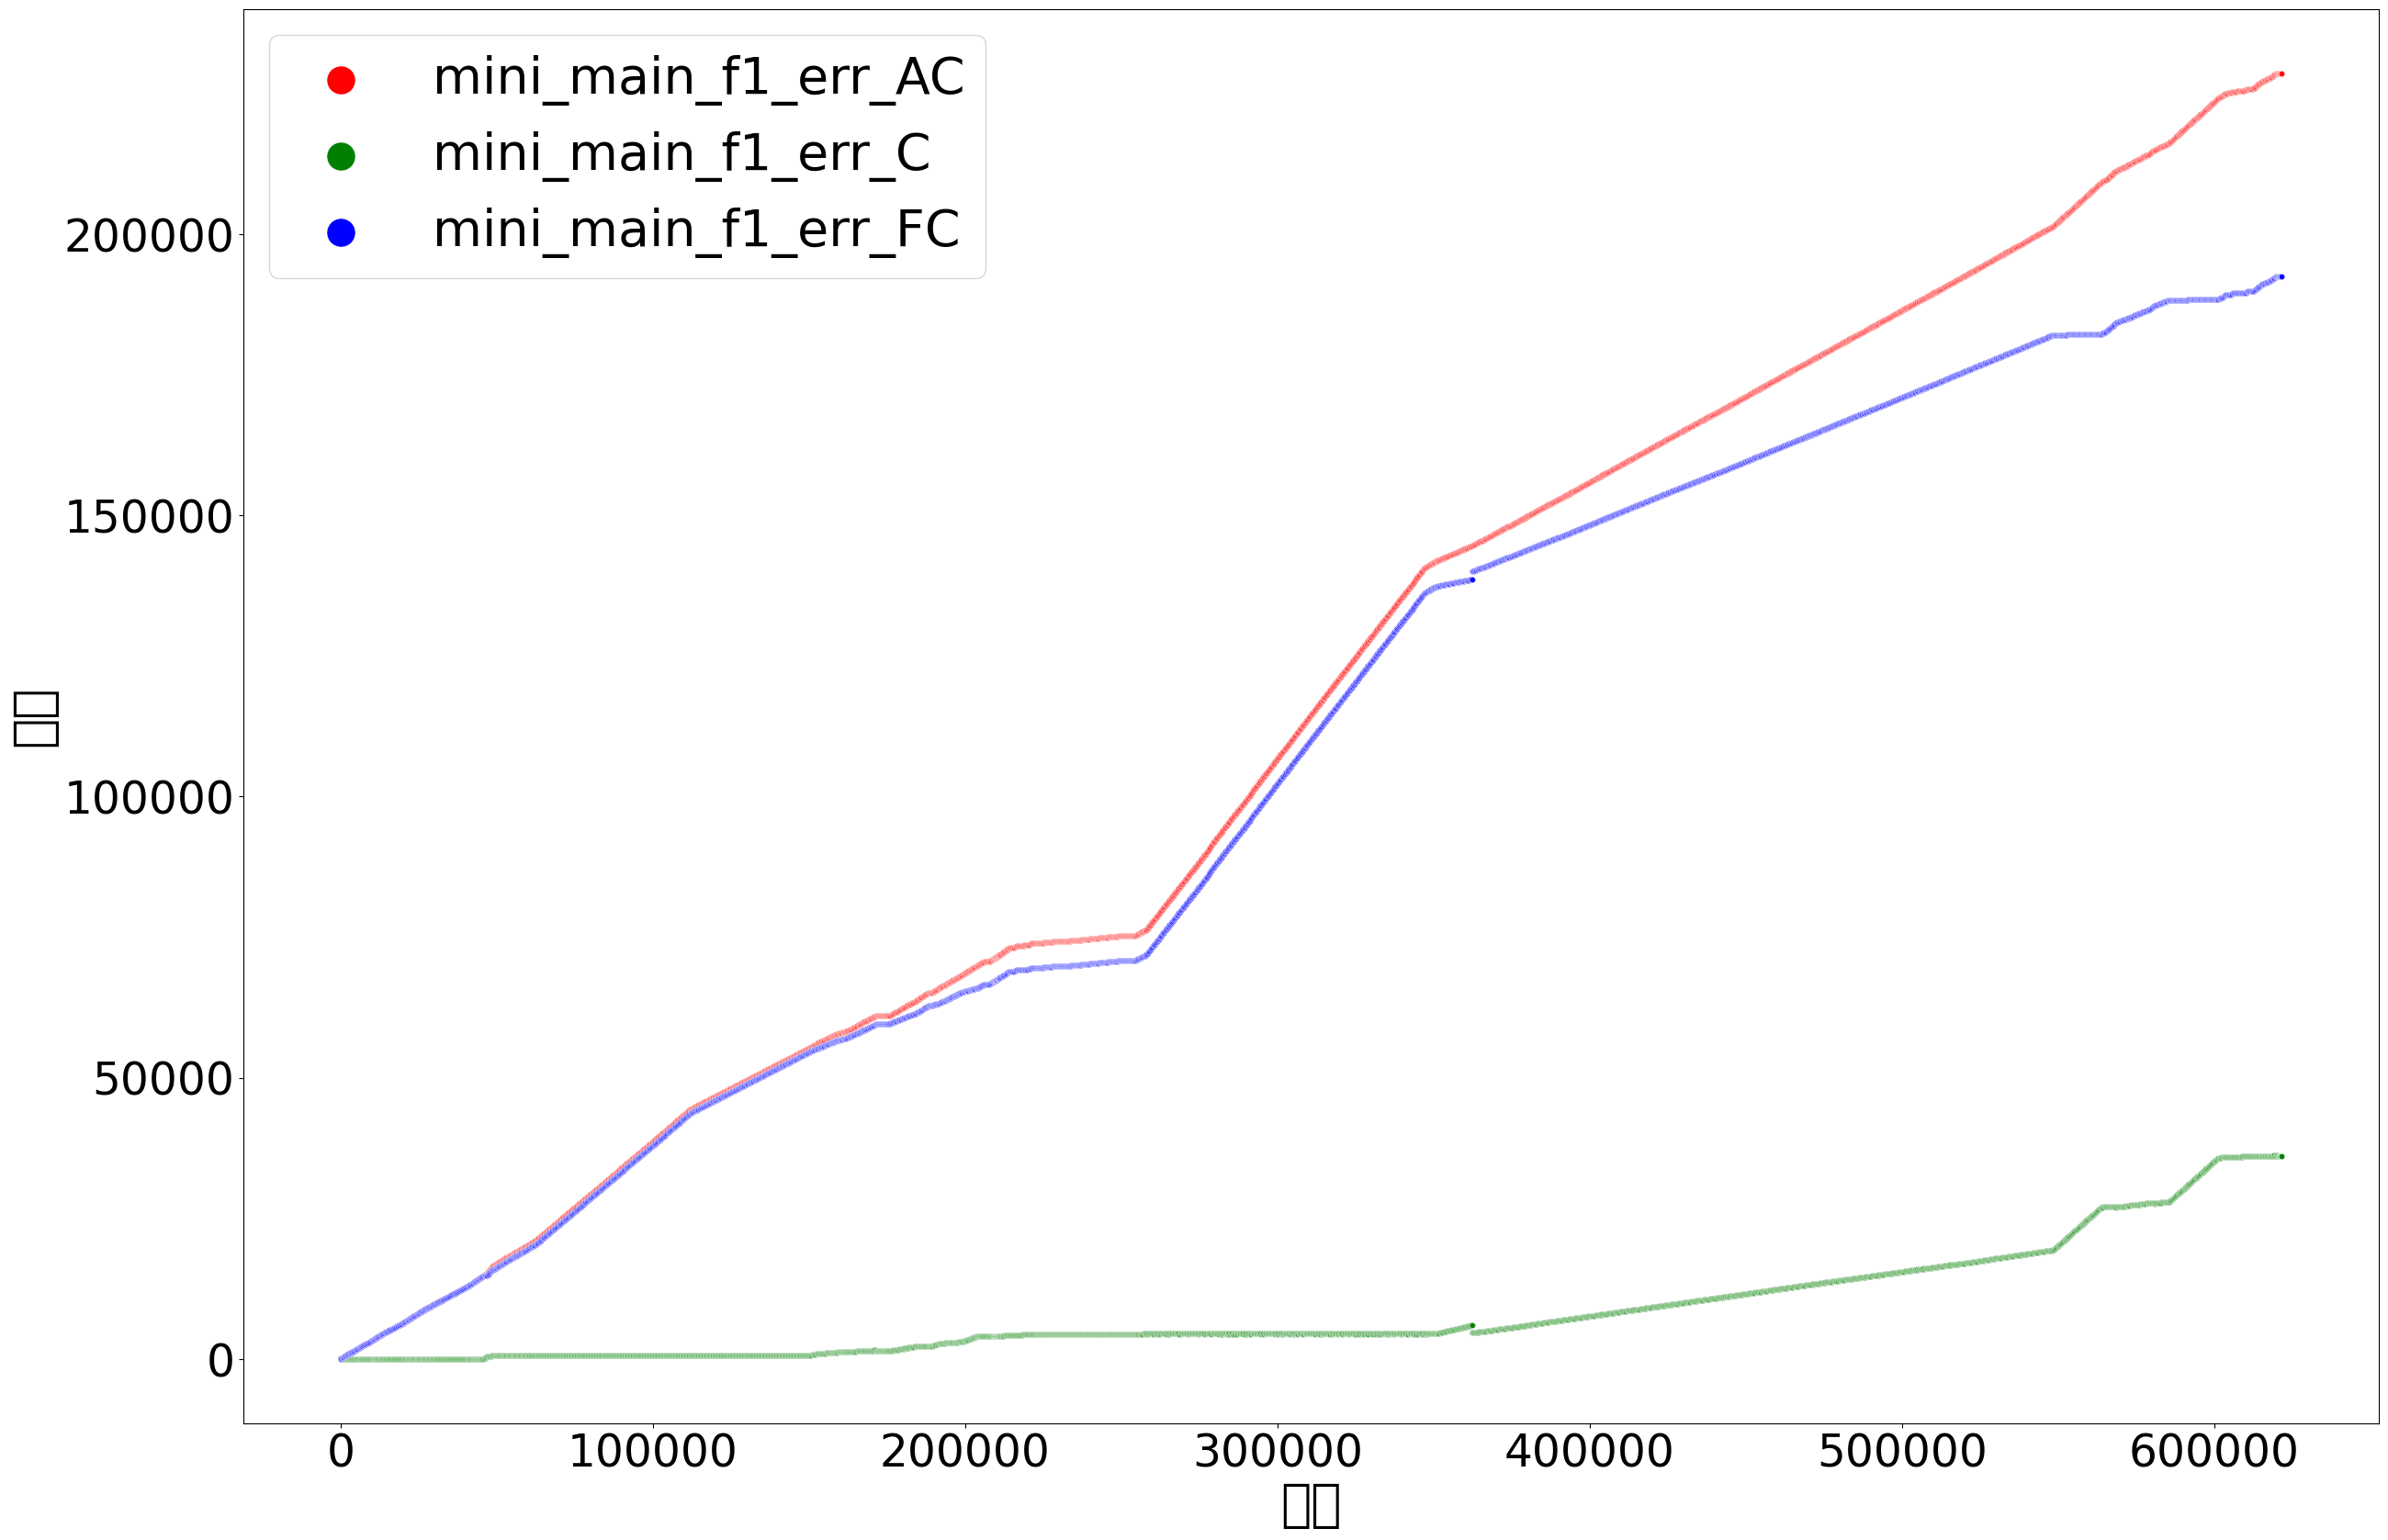

In [19]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_AC',ax=ax,color='red')  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_C',ax=ax,color='green')   
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_FC',ax=ax,color='blue')   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


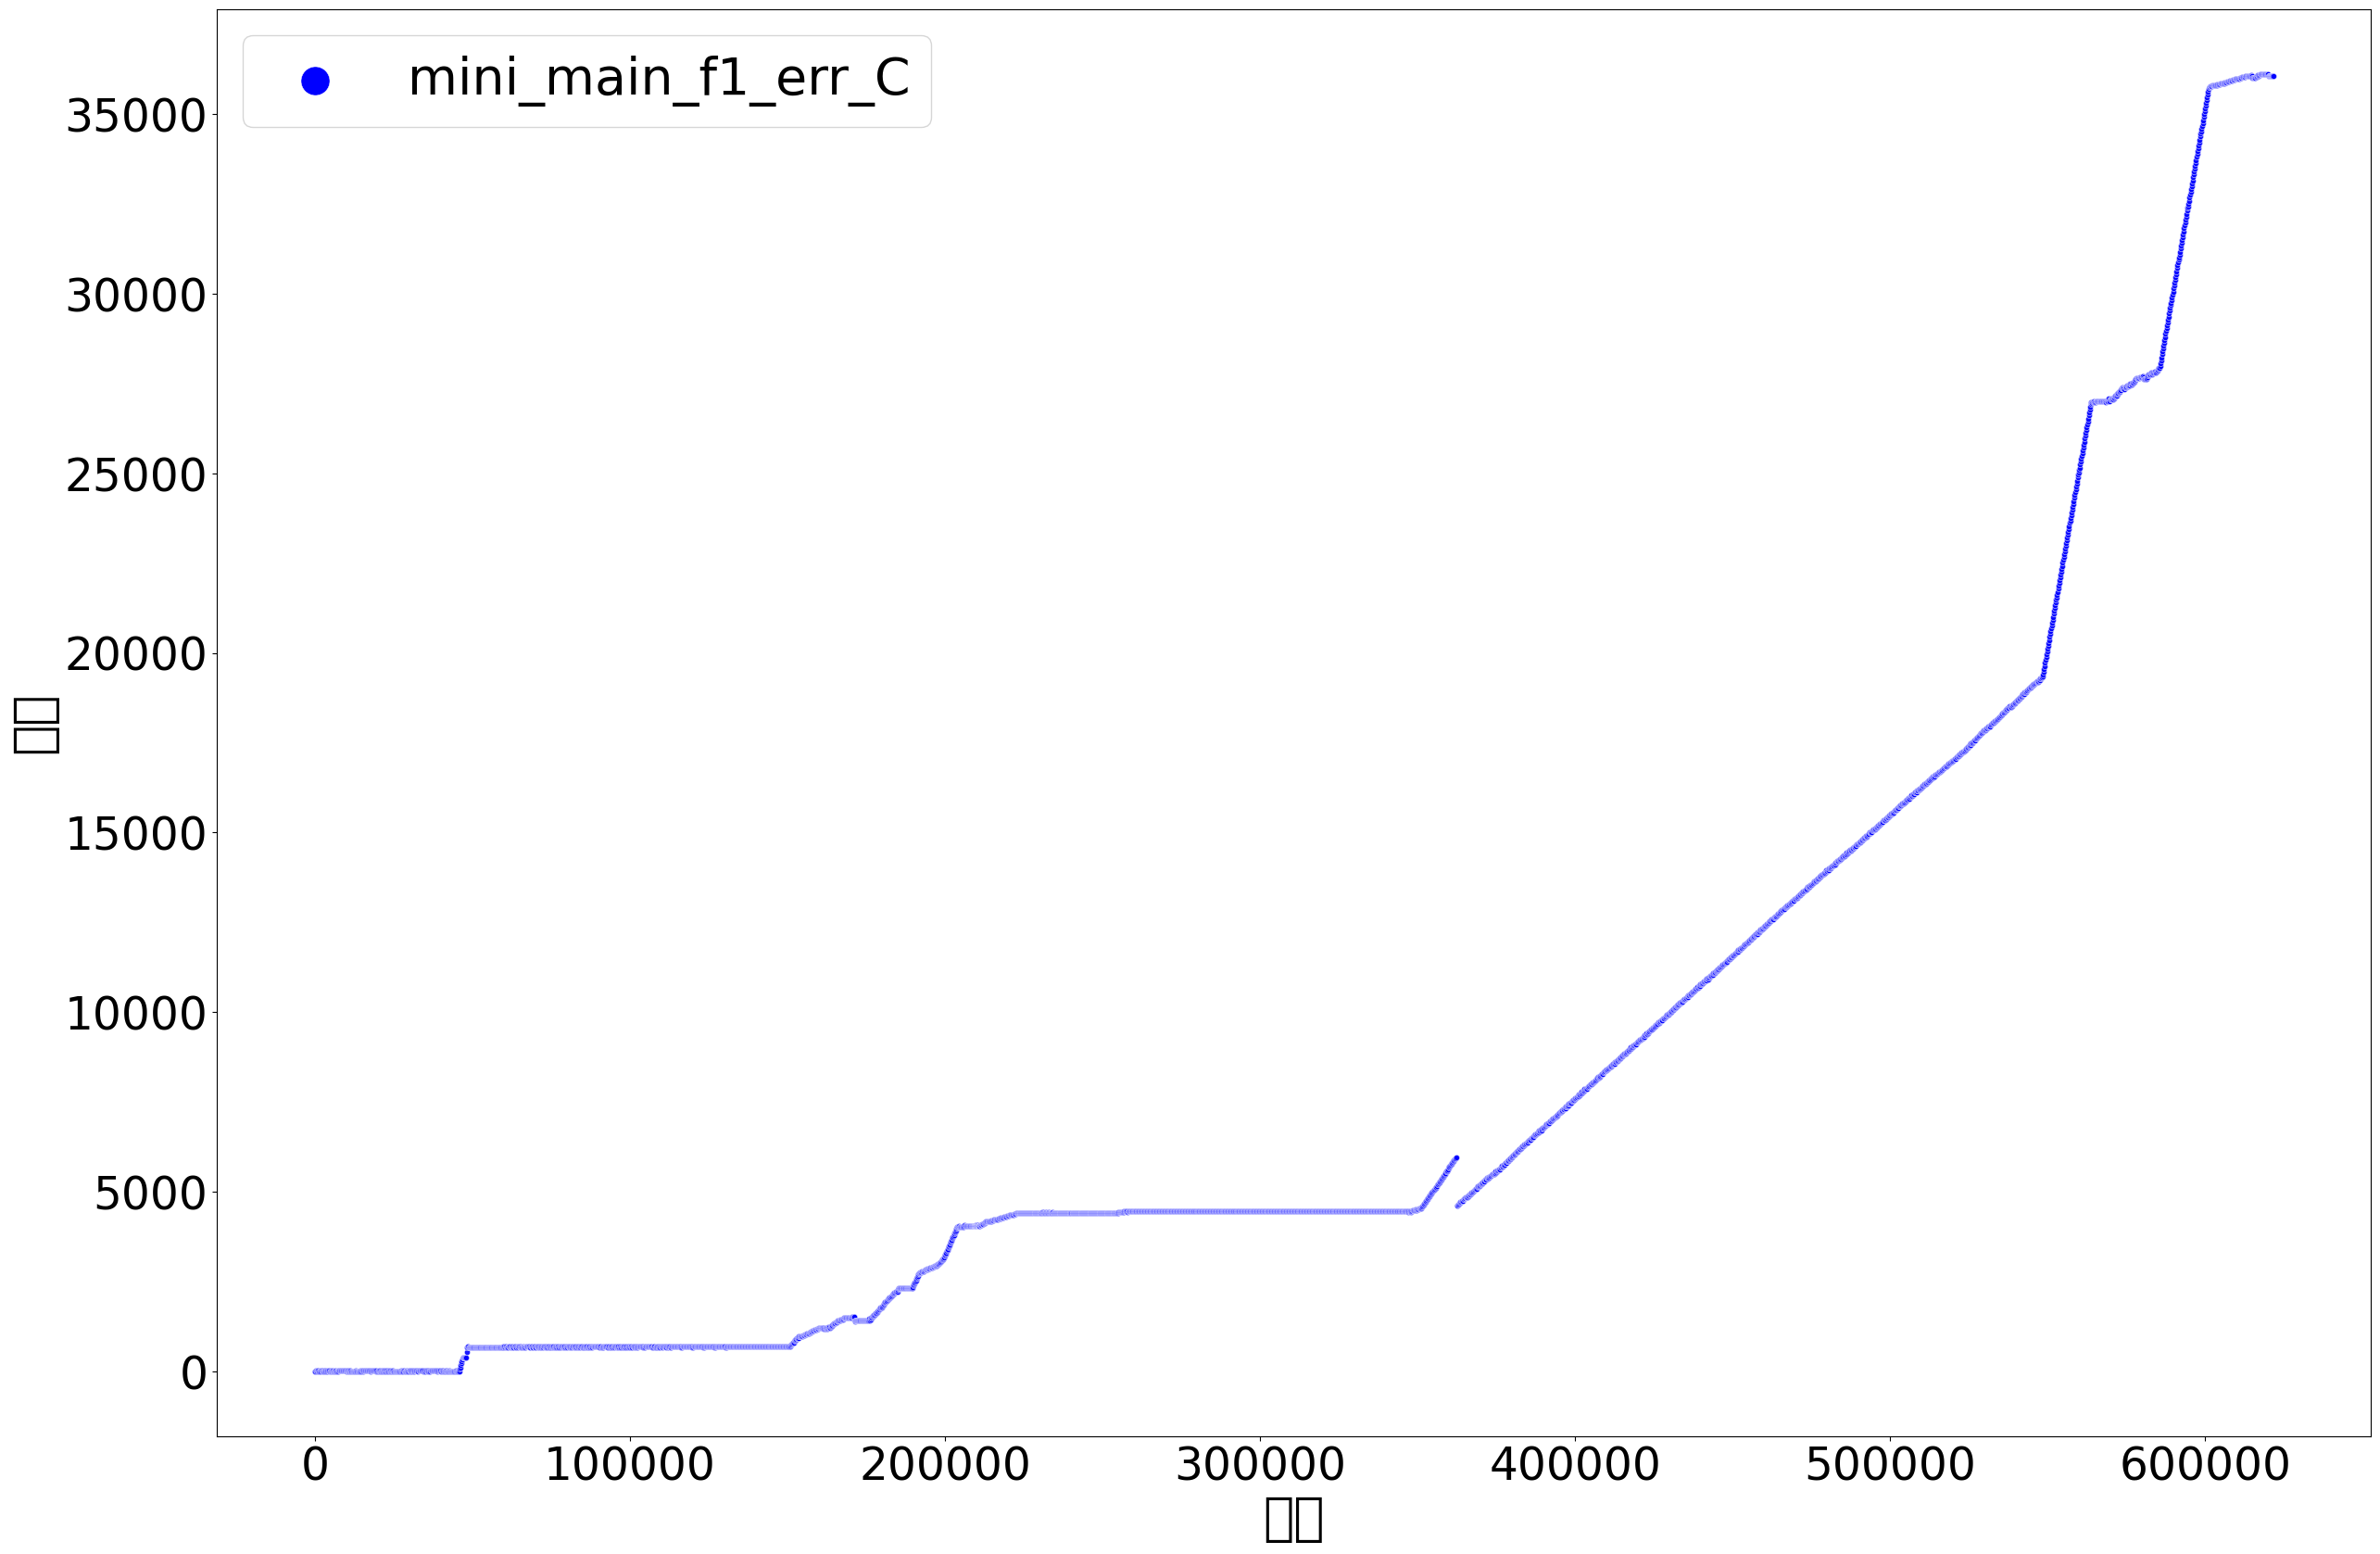

In [20]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_C',ax=ax,color='blue')   

inrease_g_size(g1)


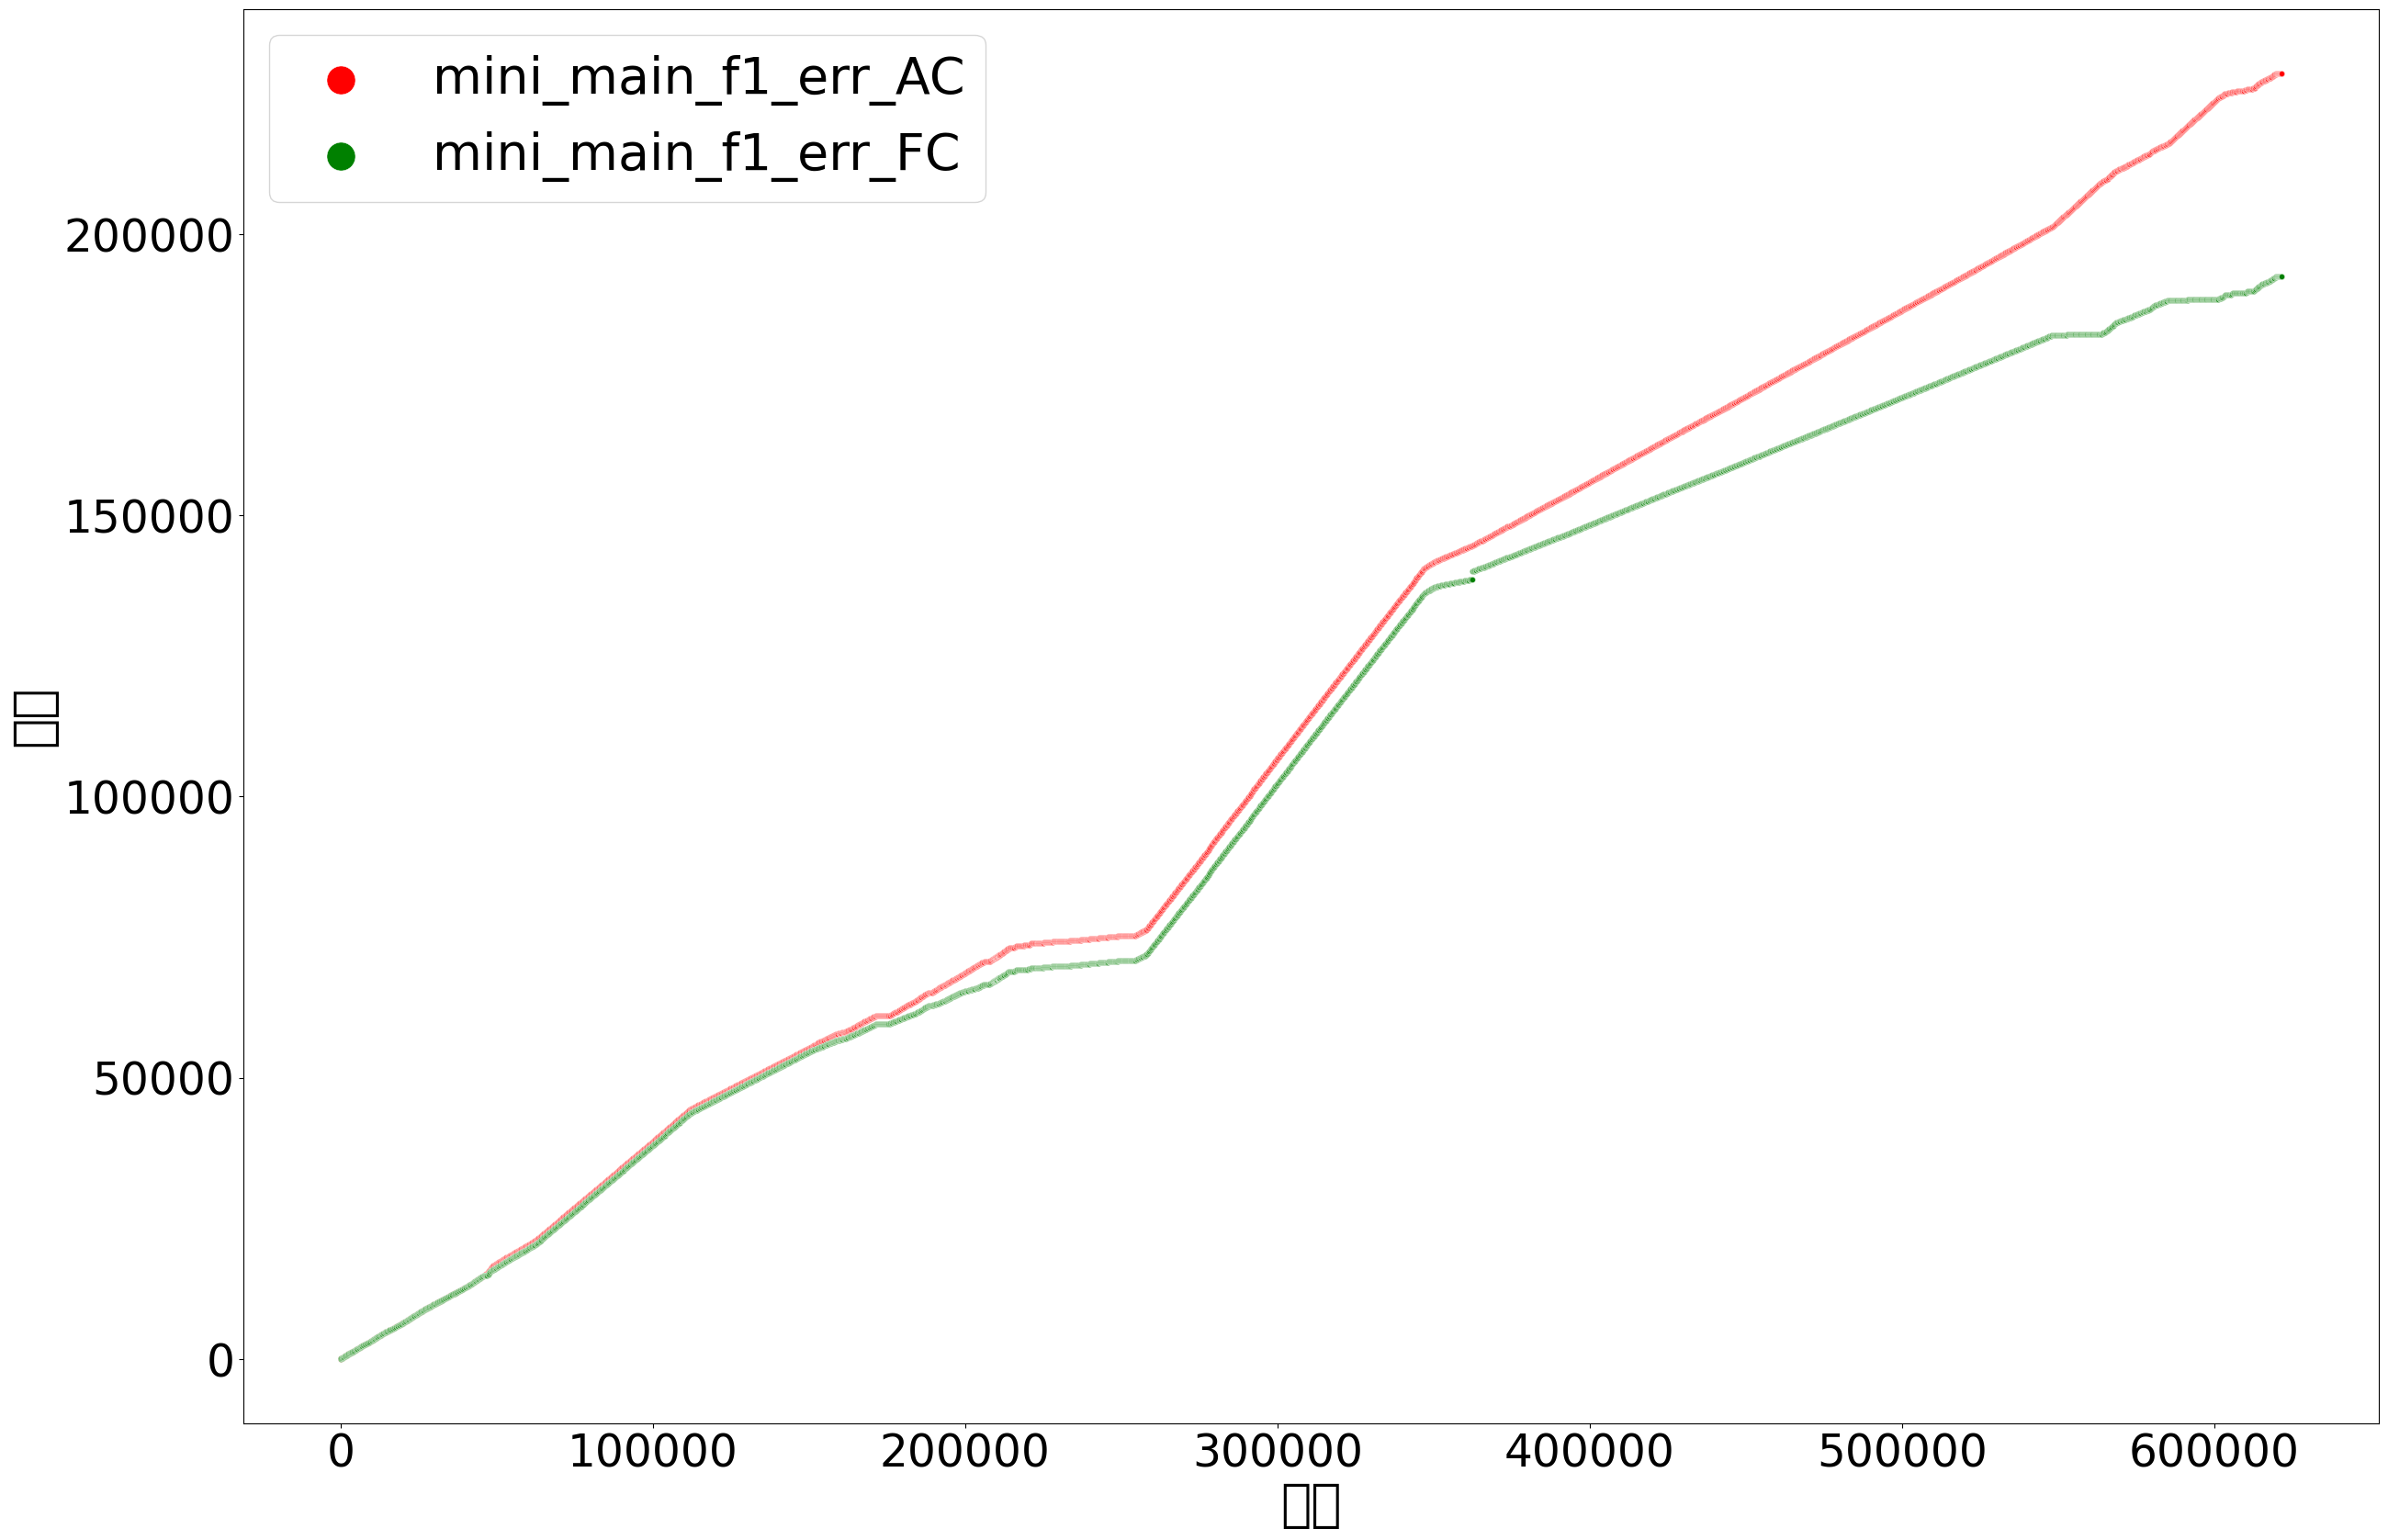

In [21]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40


g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_AC',ax=ax,color='red')  
g2=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_FC',ax=ax,color='green')   

inrease_g_size(g1)
inrease_g_size(g2)


##  3. mini_main_f1_ok.c作图

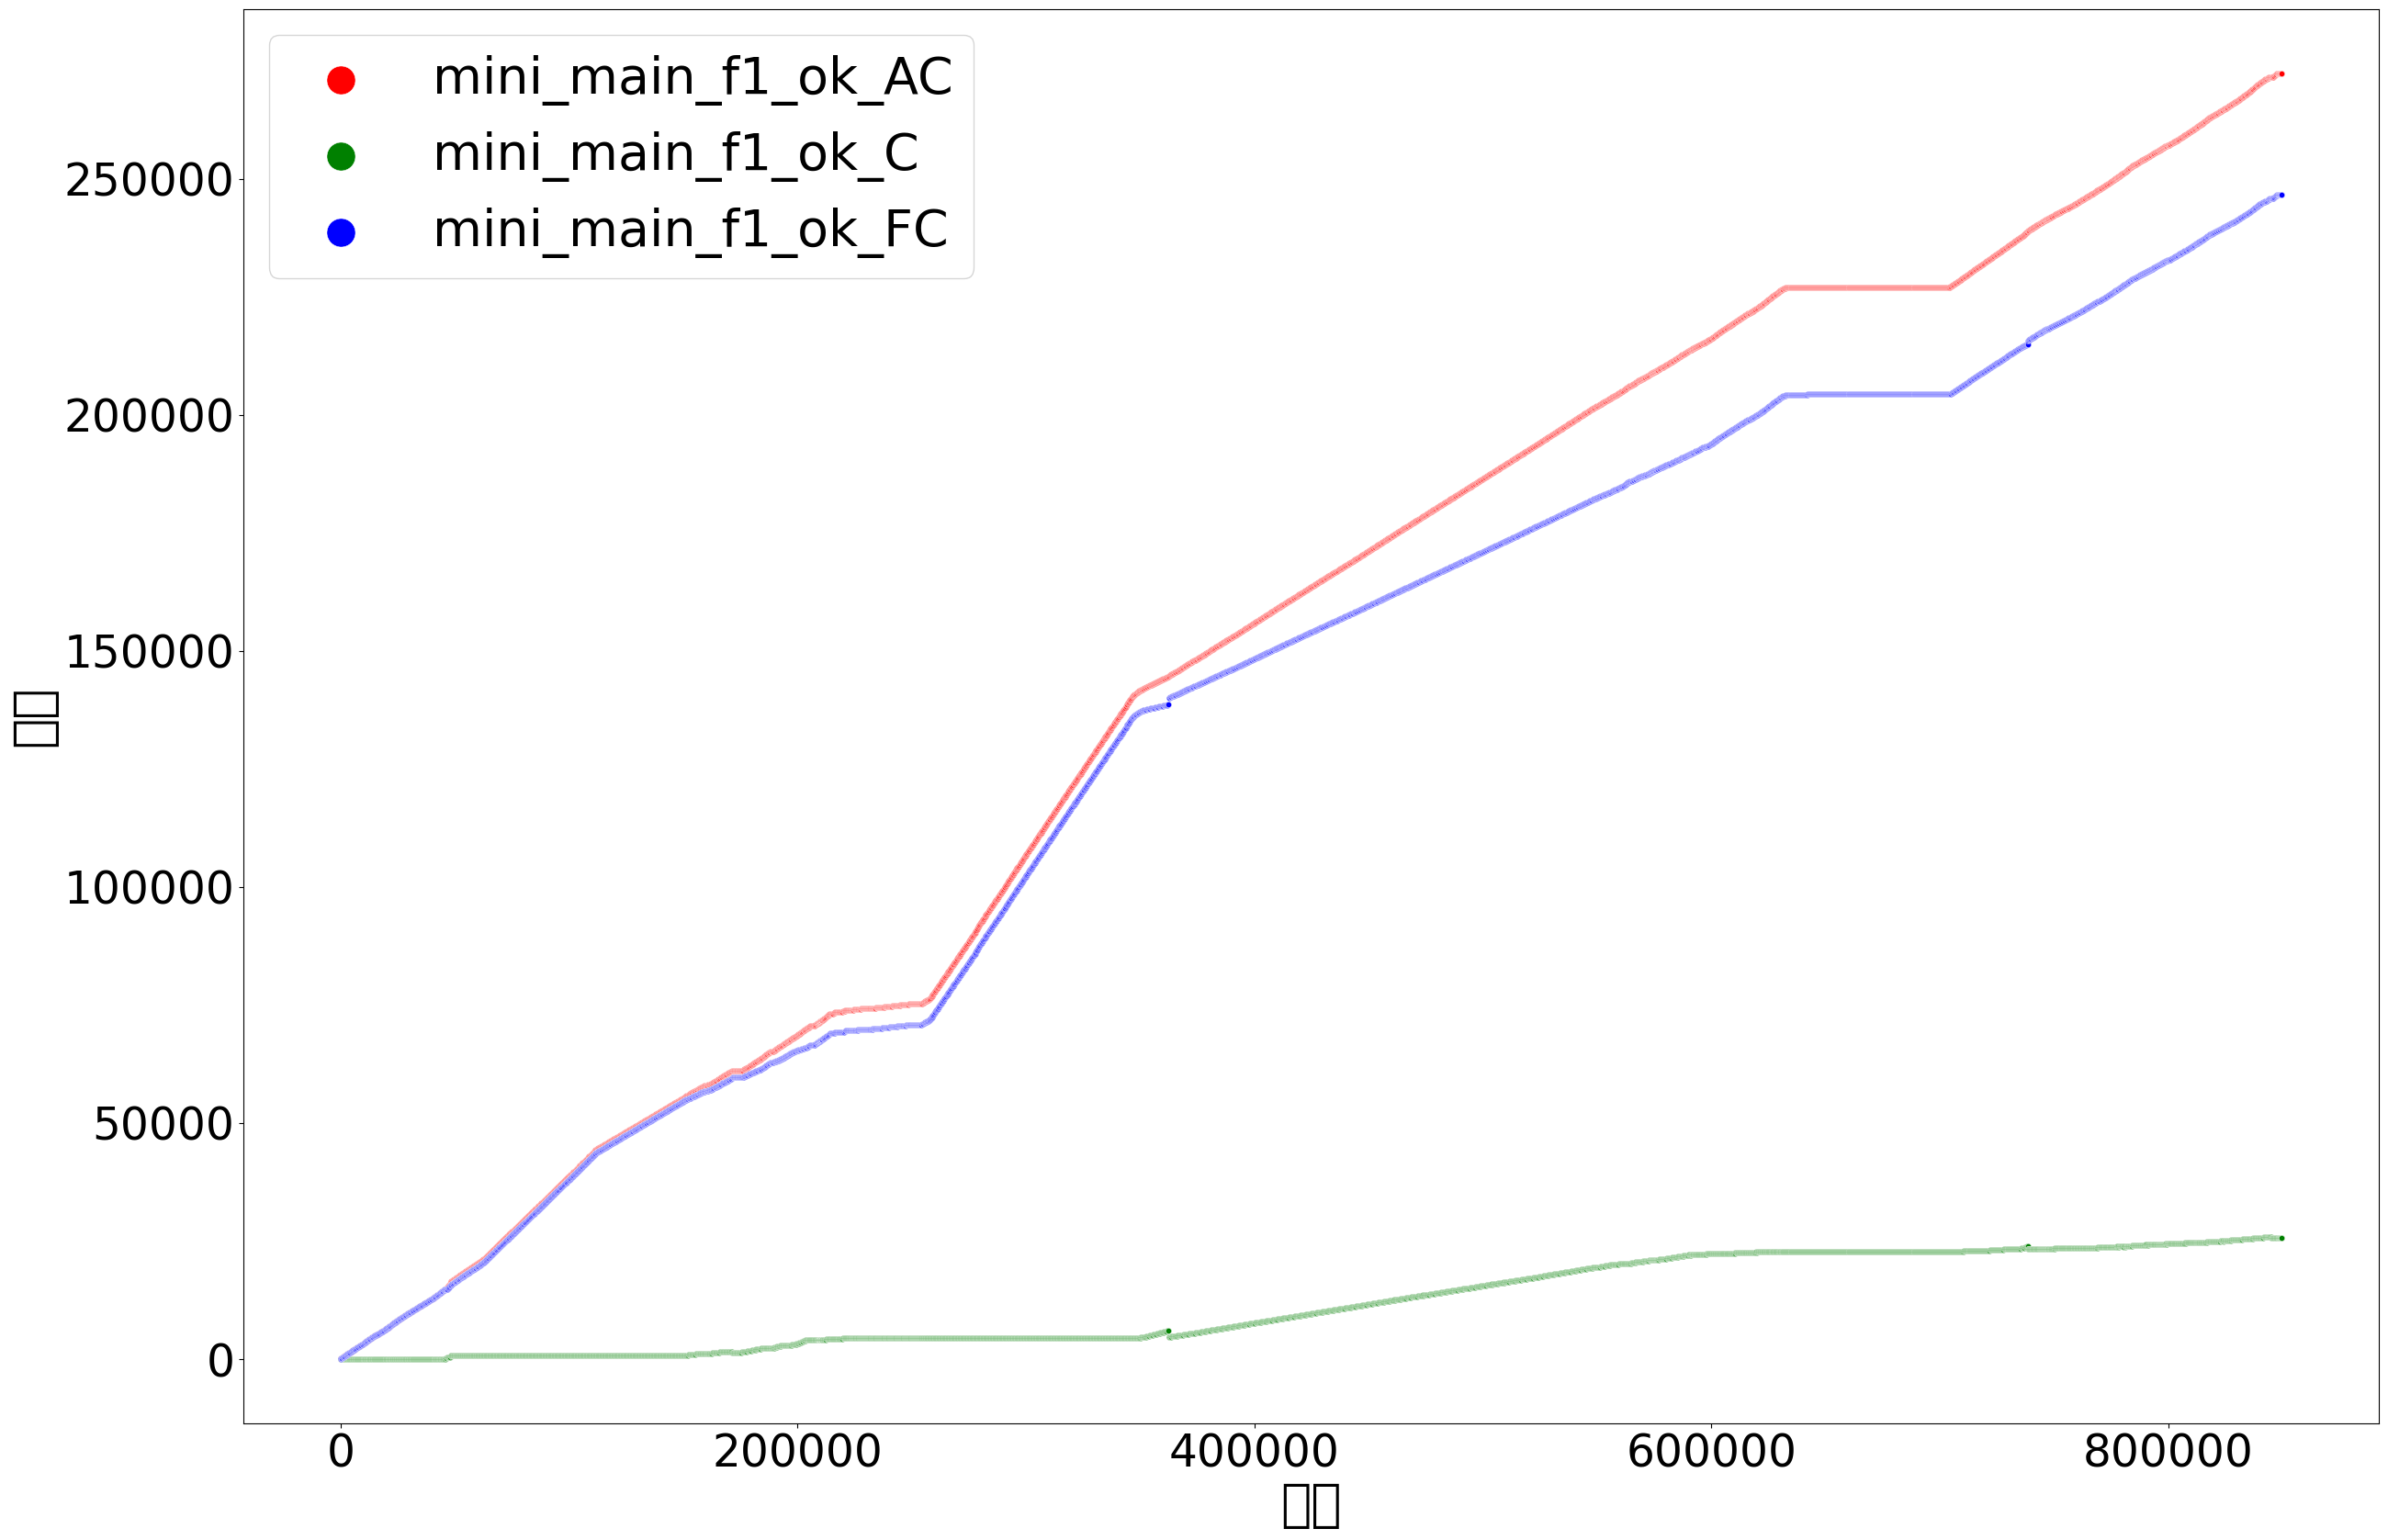

In [22]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_C',color='green',ax=ax)   
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_FC',color='blue',ax=ax)   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


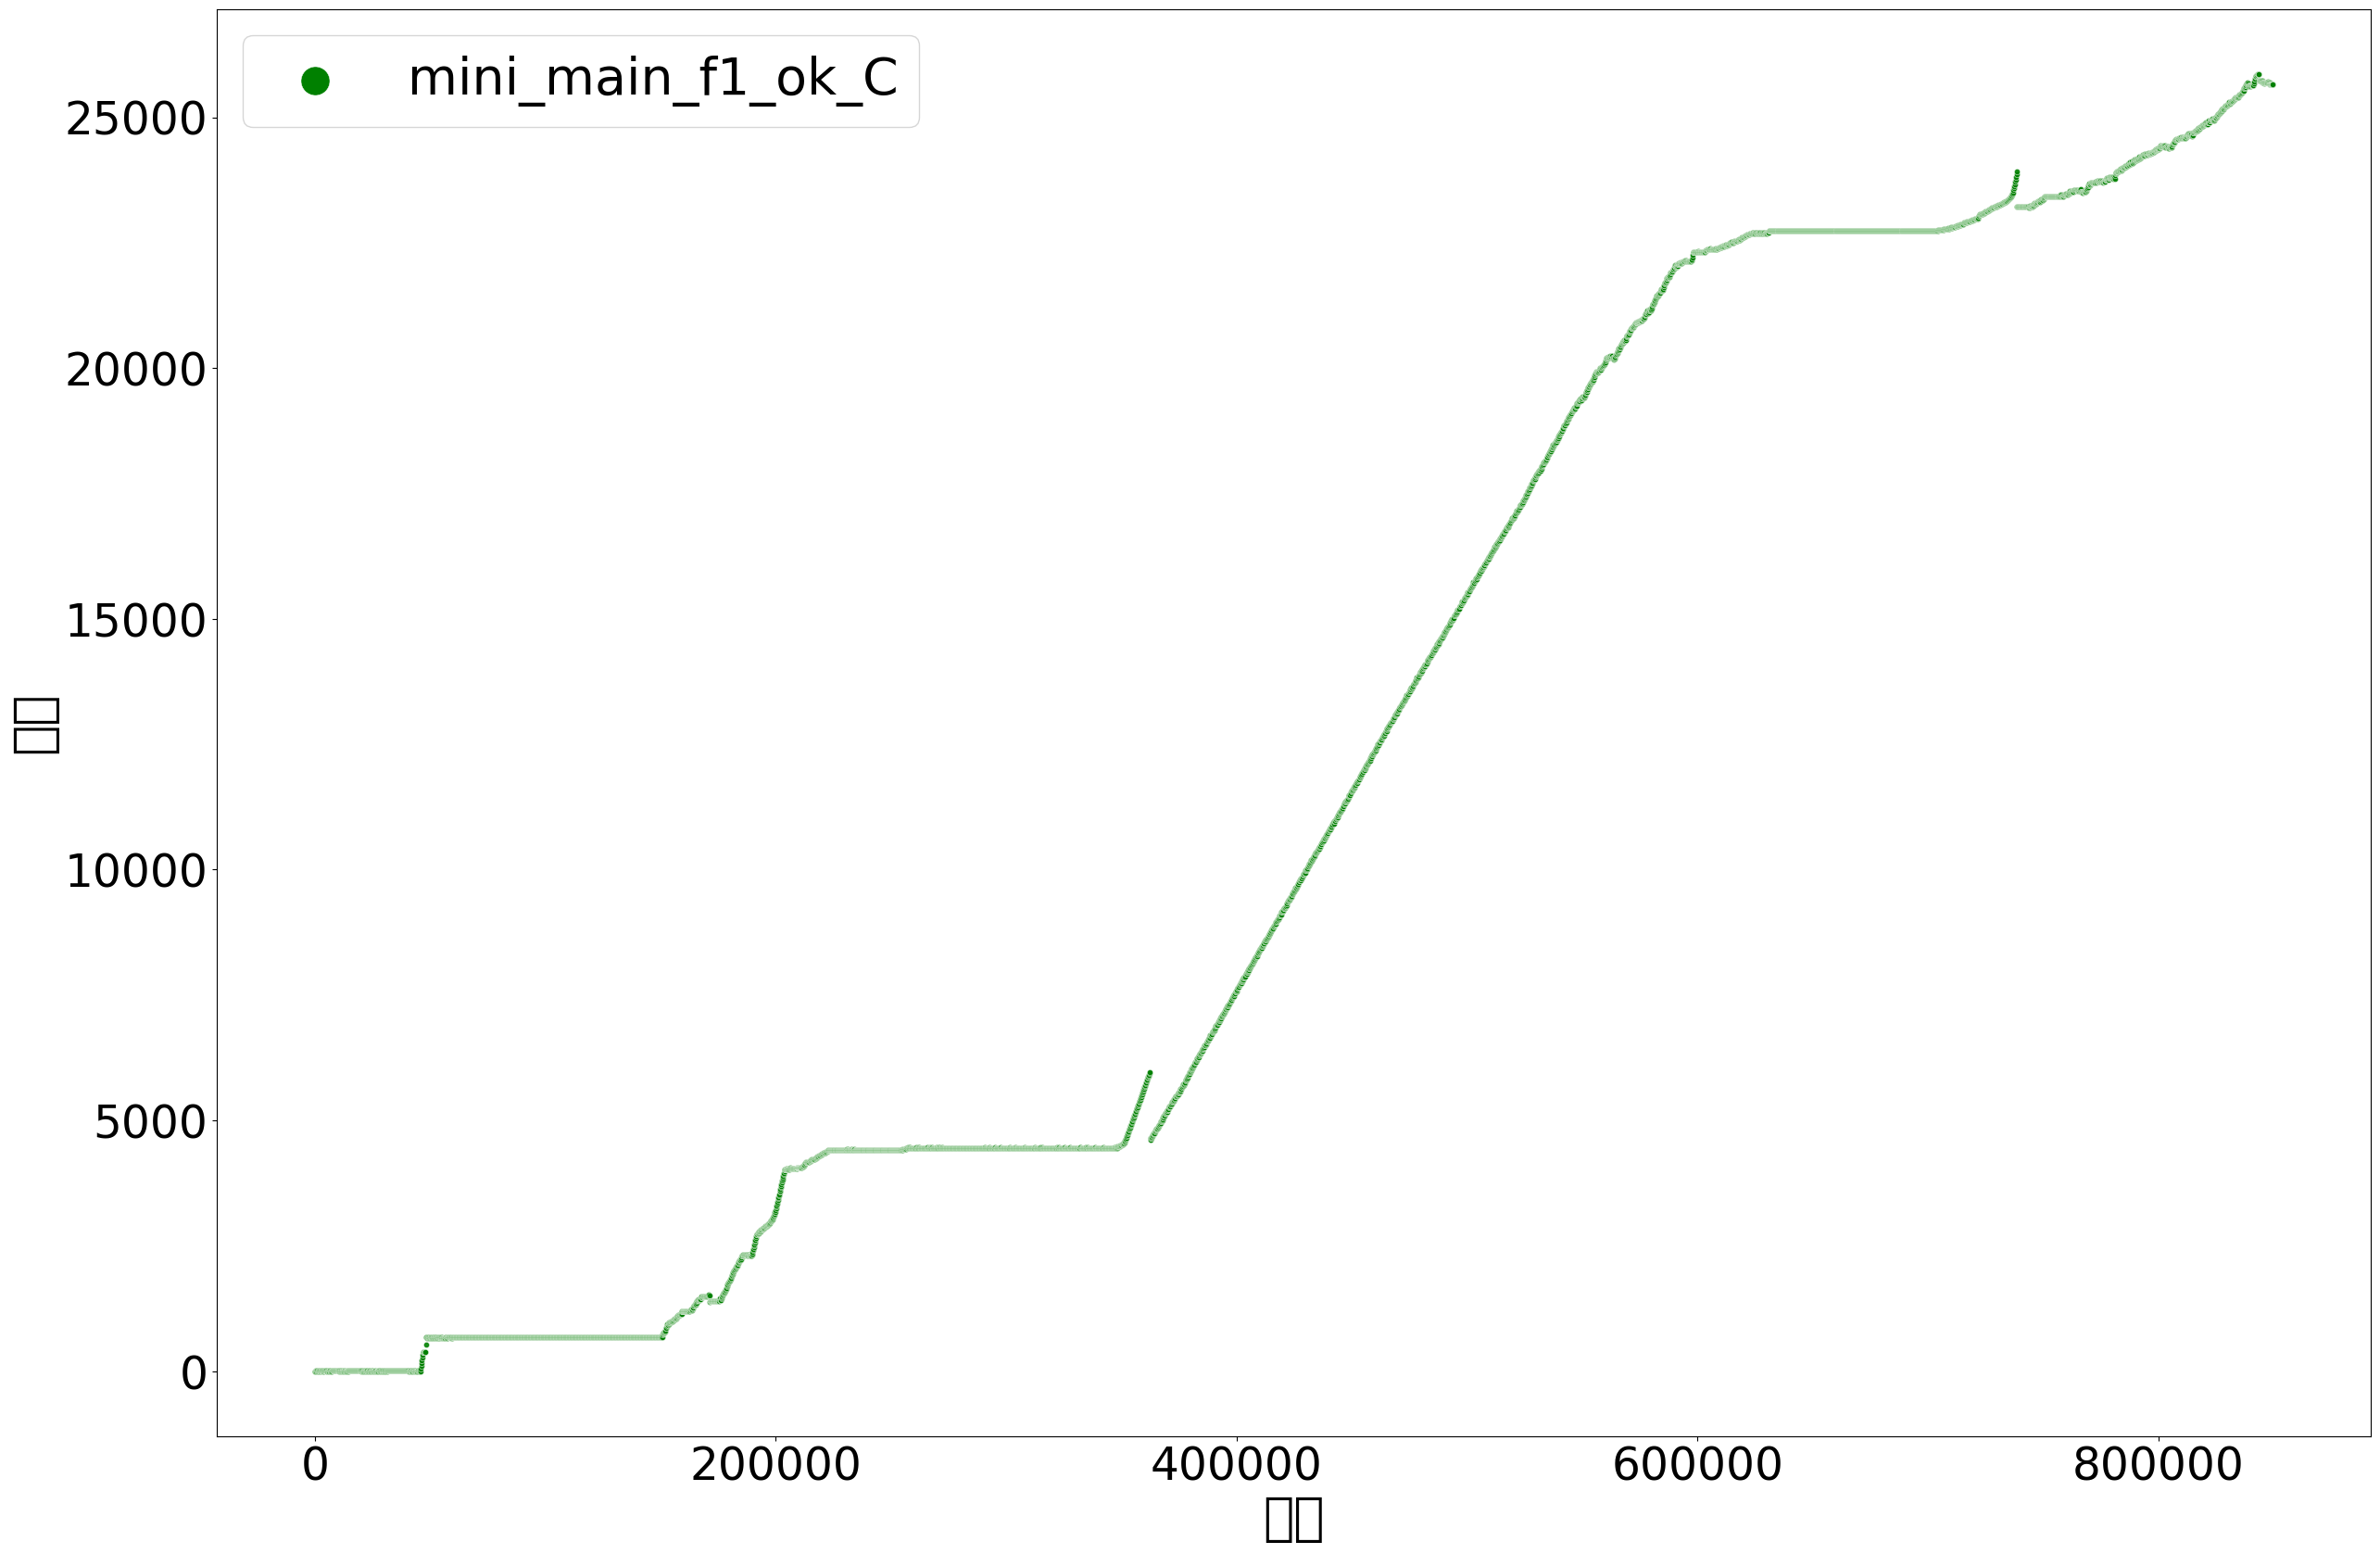

In [23]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40


g1=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_C',ax=ax,color='green')   

inrease_g_size(g1)


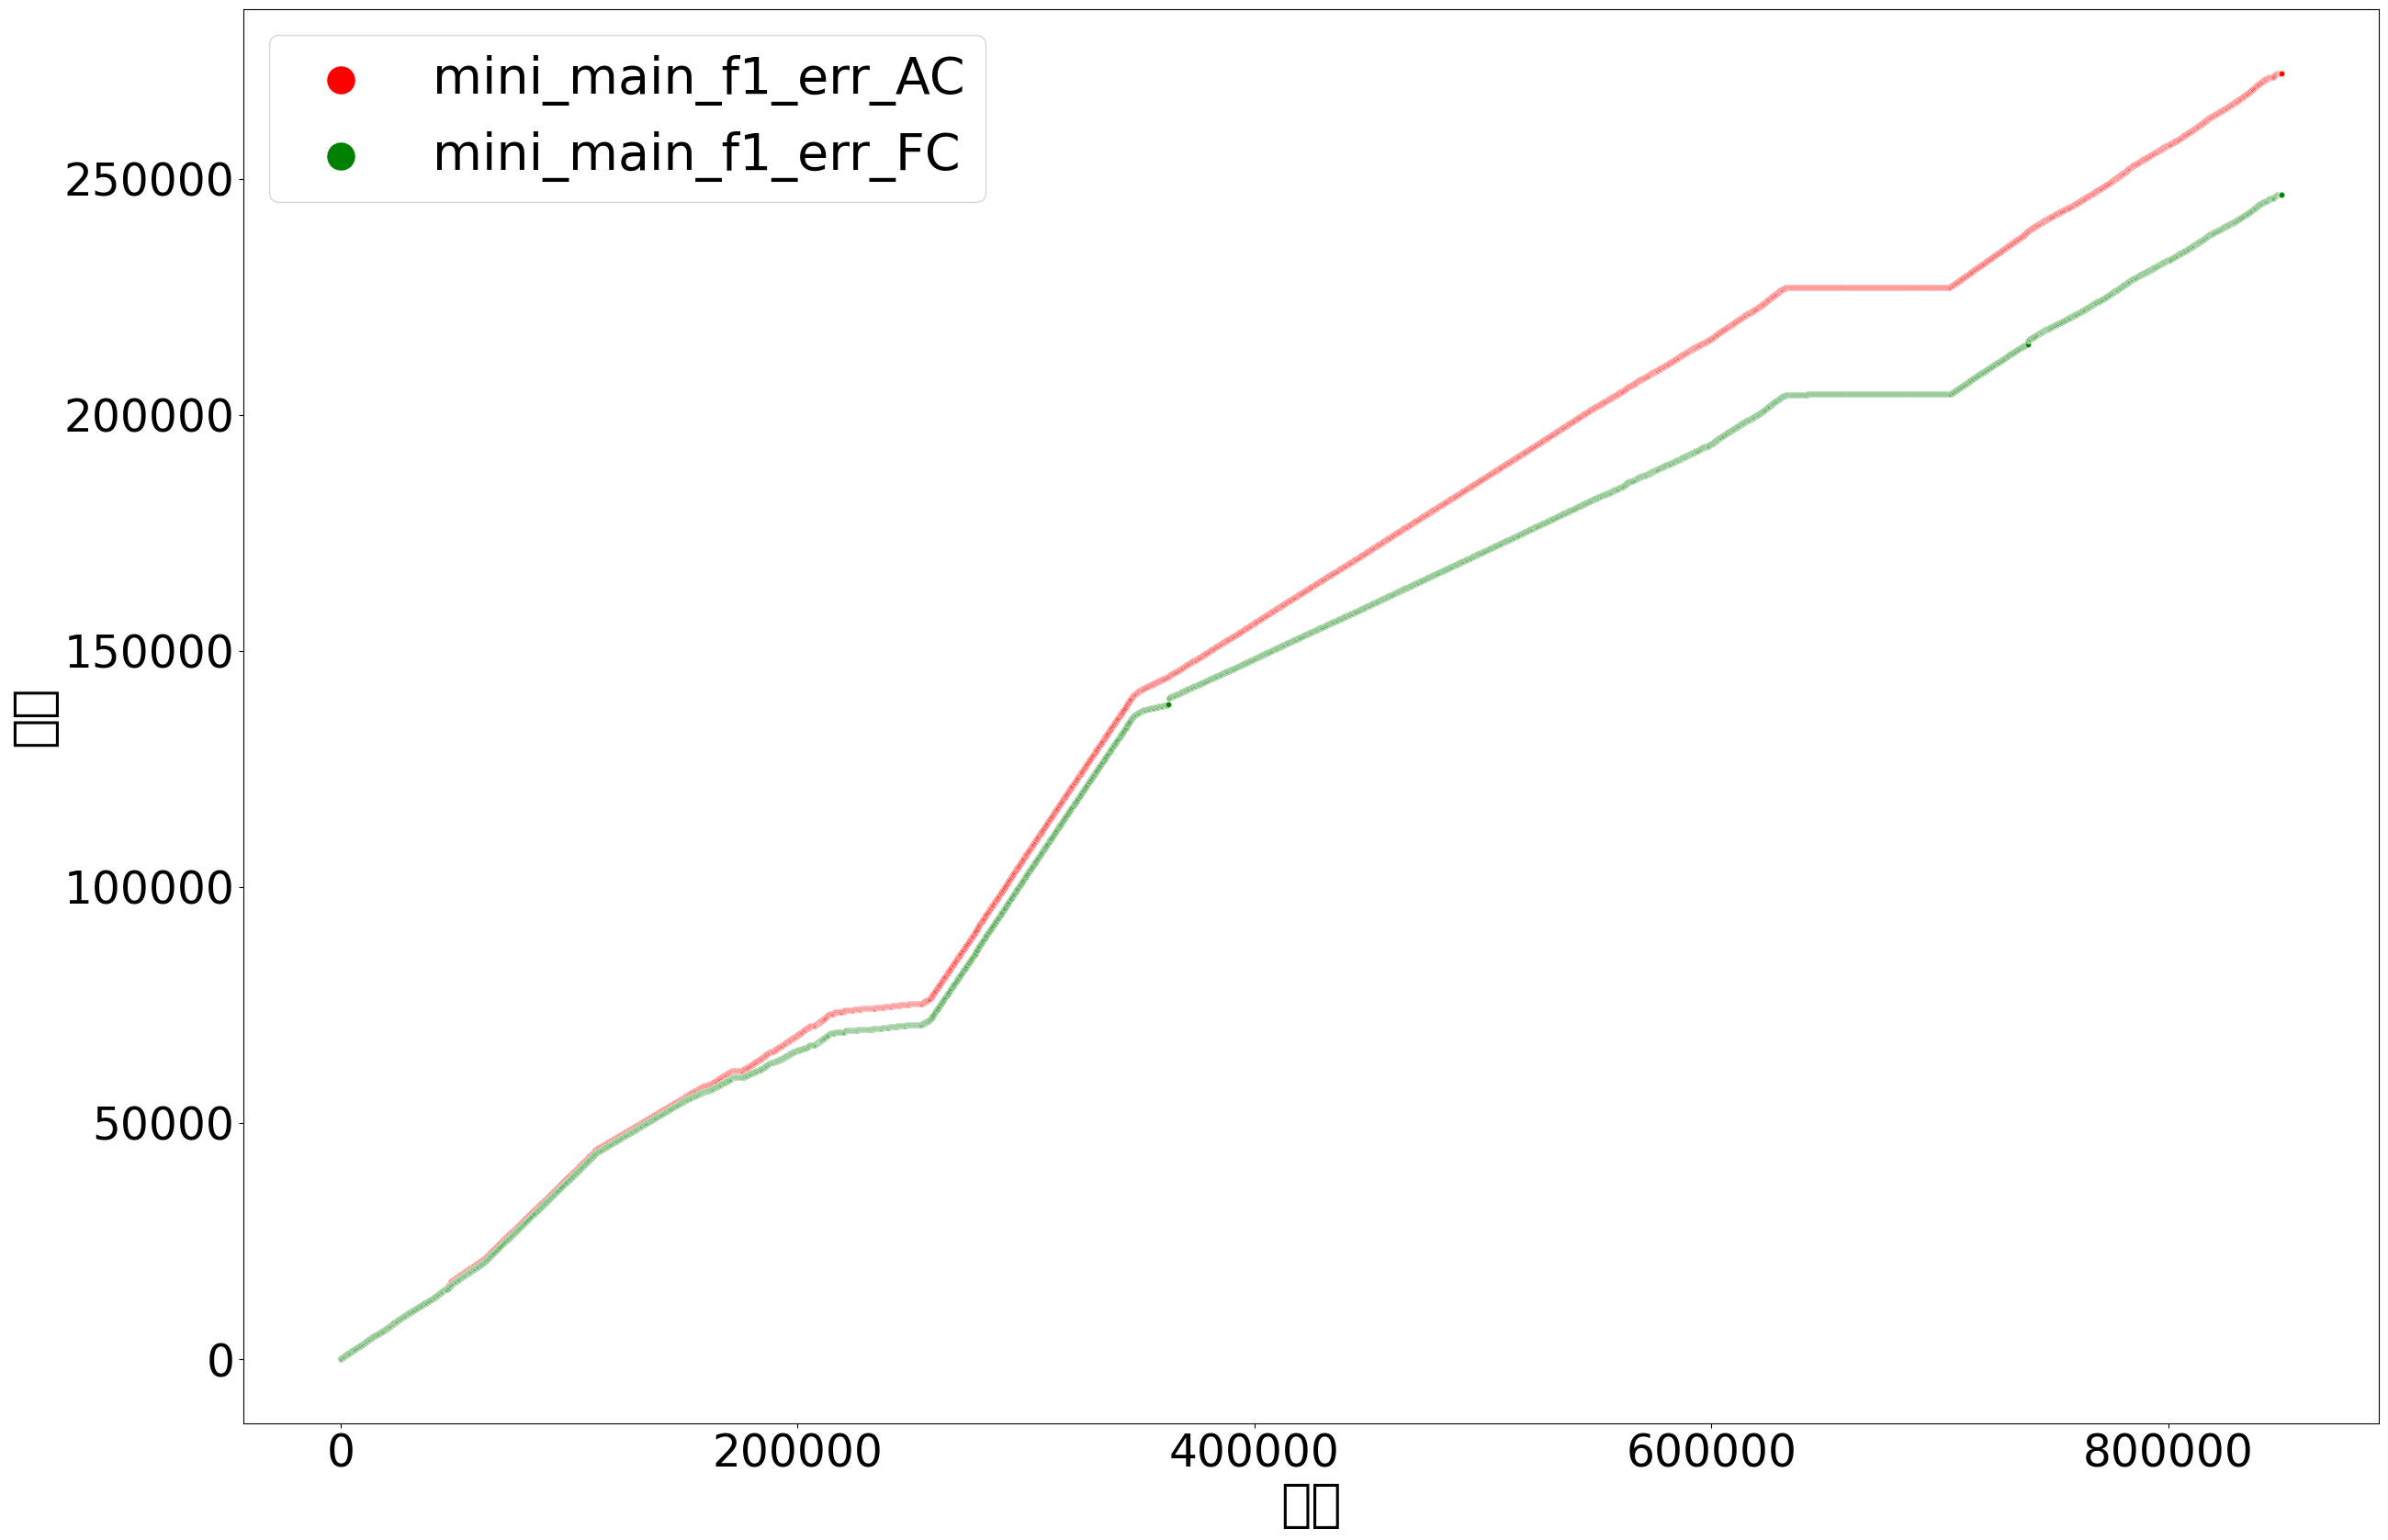

In [24]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_err_AC',ax=ax,color='red')  
g2=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_err_FC',ax=ax,color='green')

inrease_g_size(g1)
inrease_g_size(g2)


## 4. mini_main_include_user.c作图

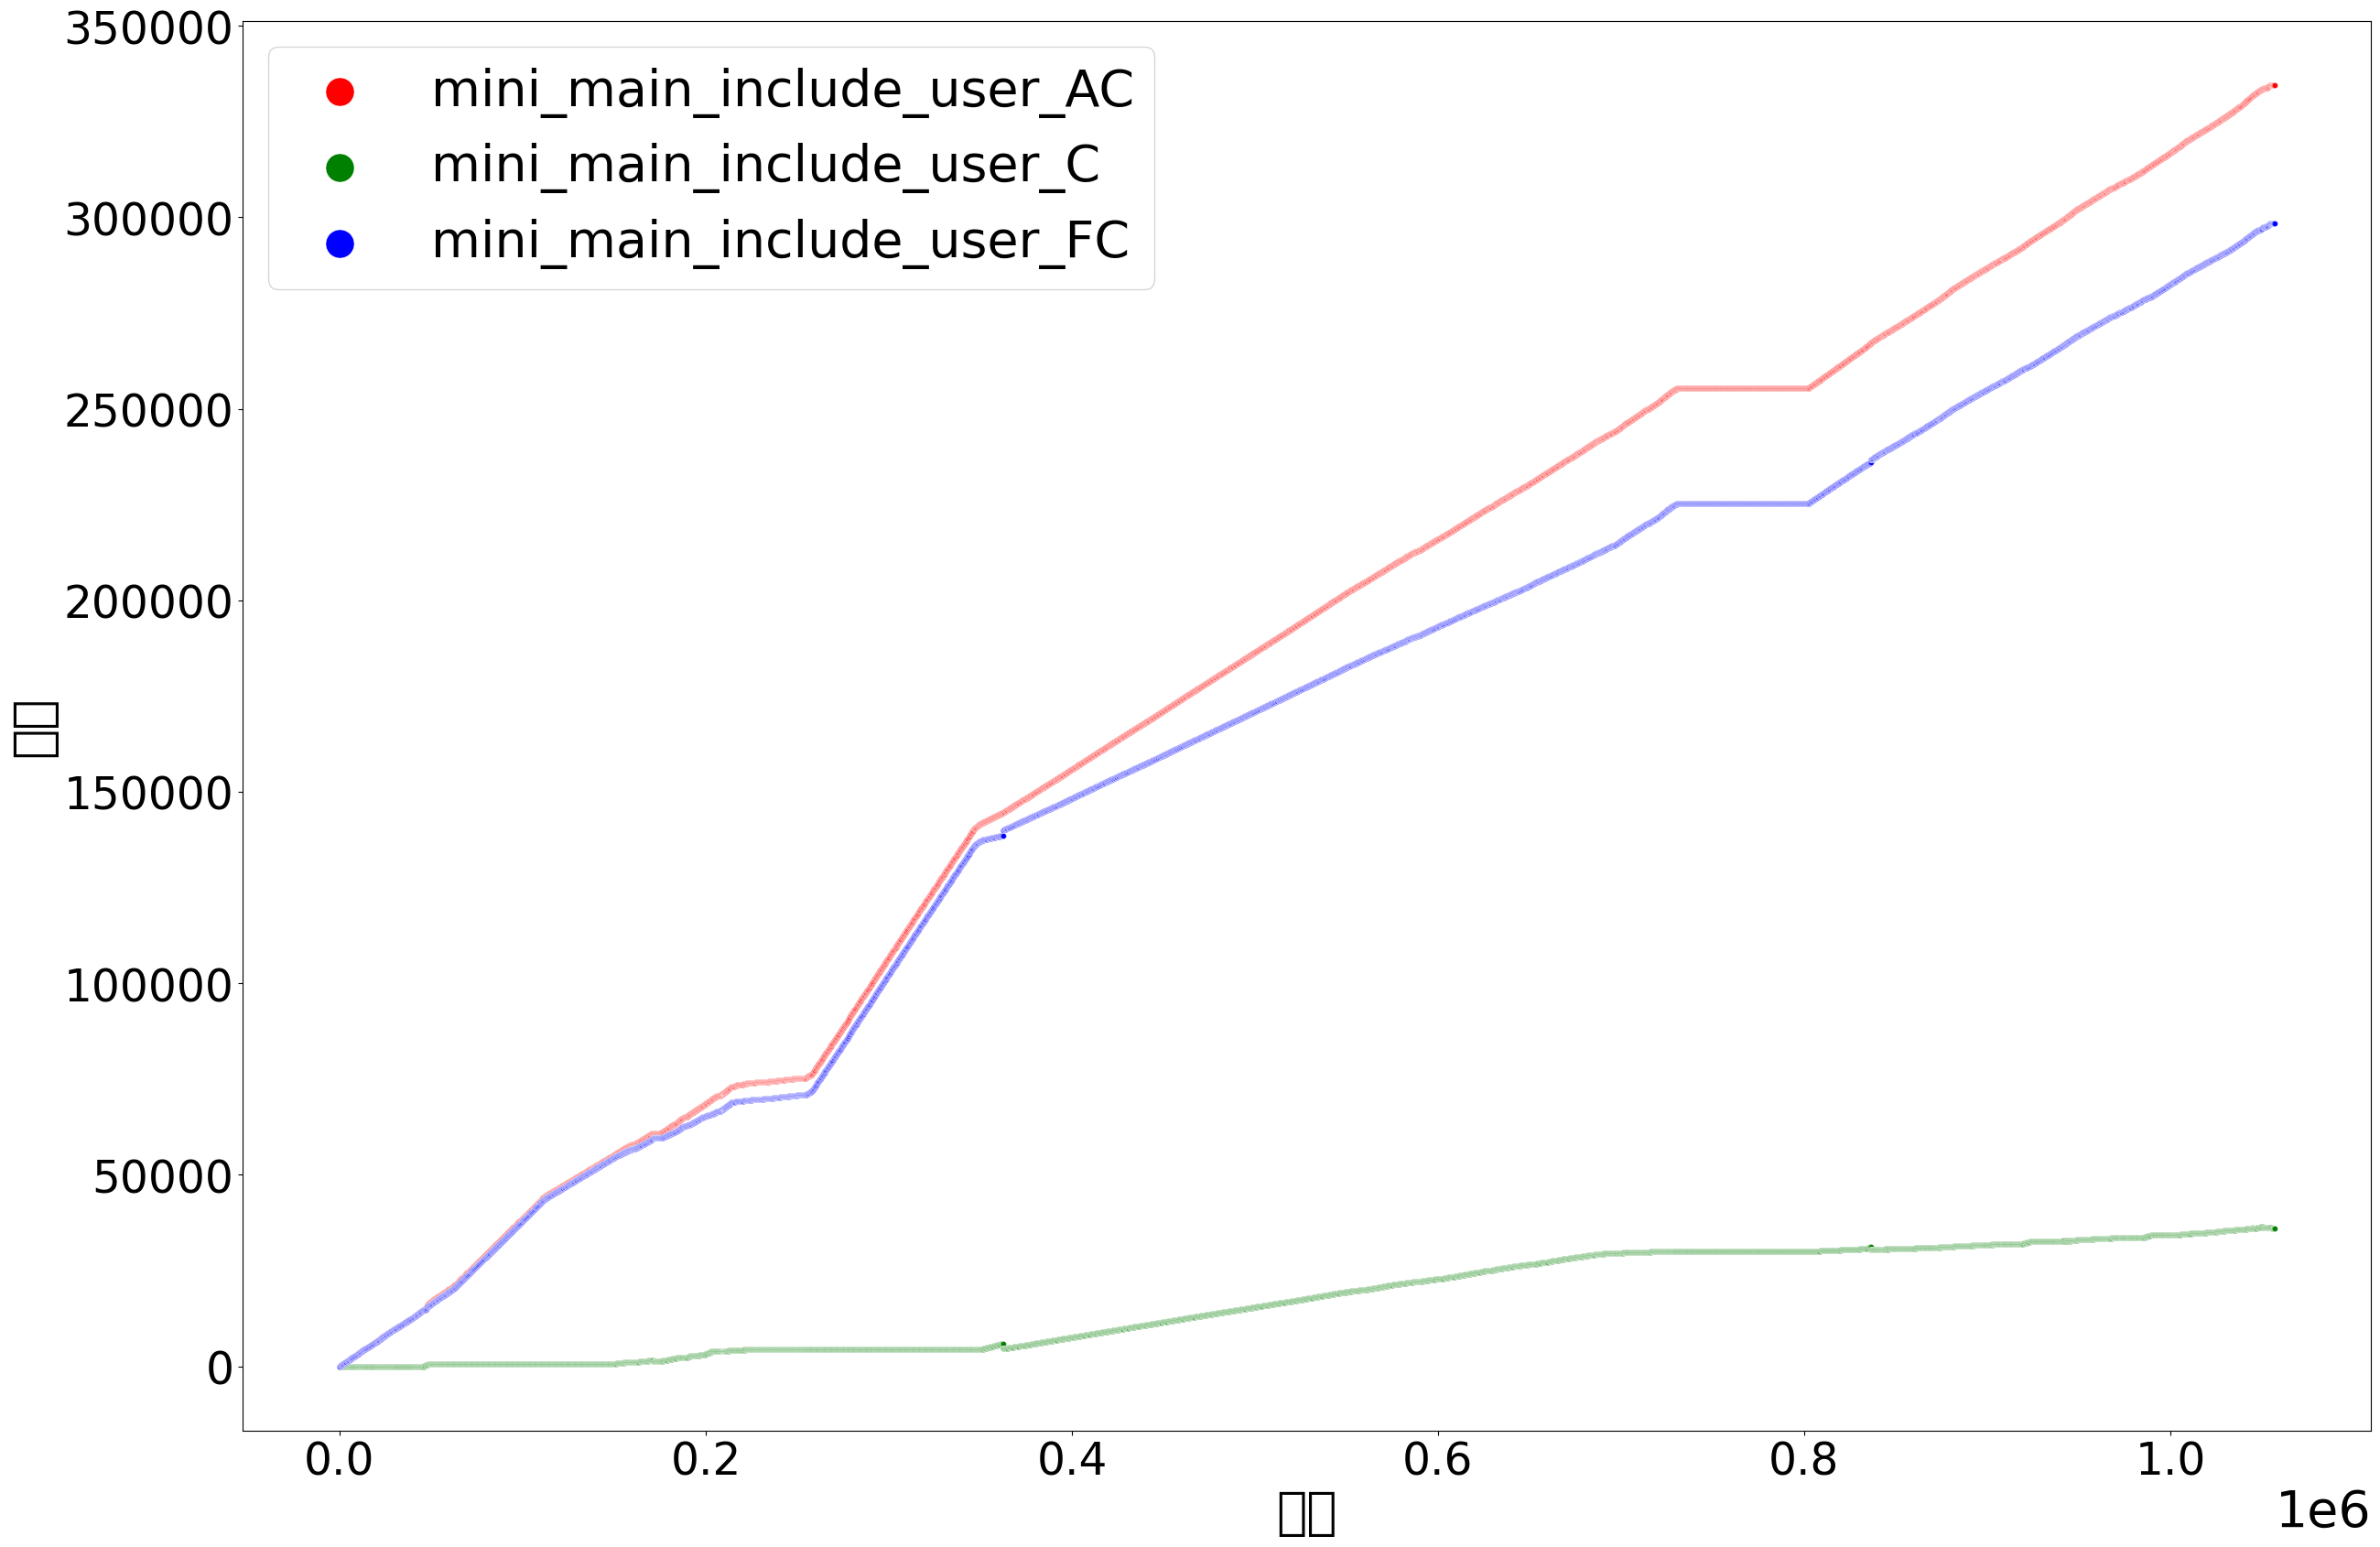

In [25]:

fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_include_user, alpha=0.9, s=20, label='mini_main_include_user_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_include_user, alpha=0.9, s=20, label='mini_main_include_user_C',color='green',ax=ax)   
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_include_user, alpha=0.9, s=20, label='mini_main_include_user_FC',color='blue',ax=ax)   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


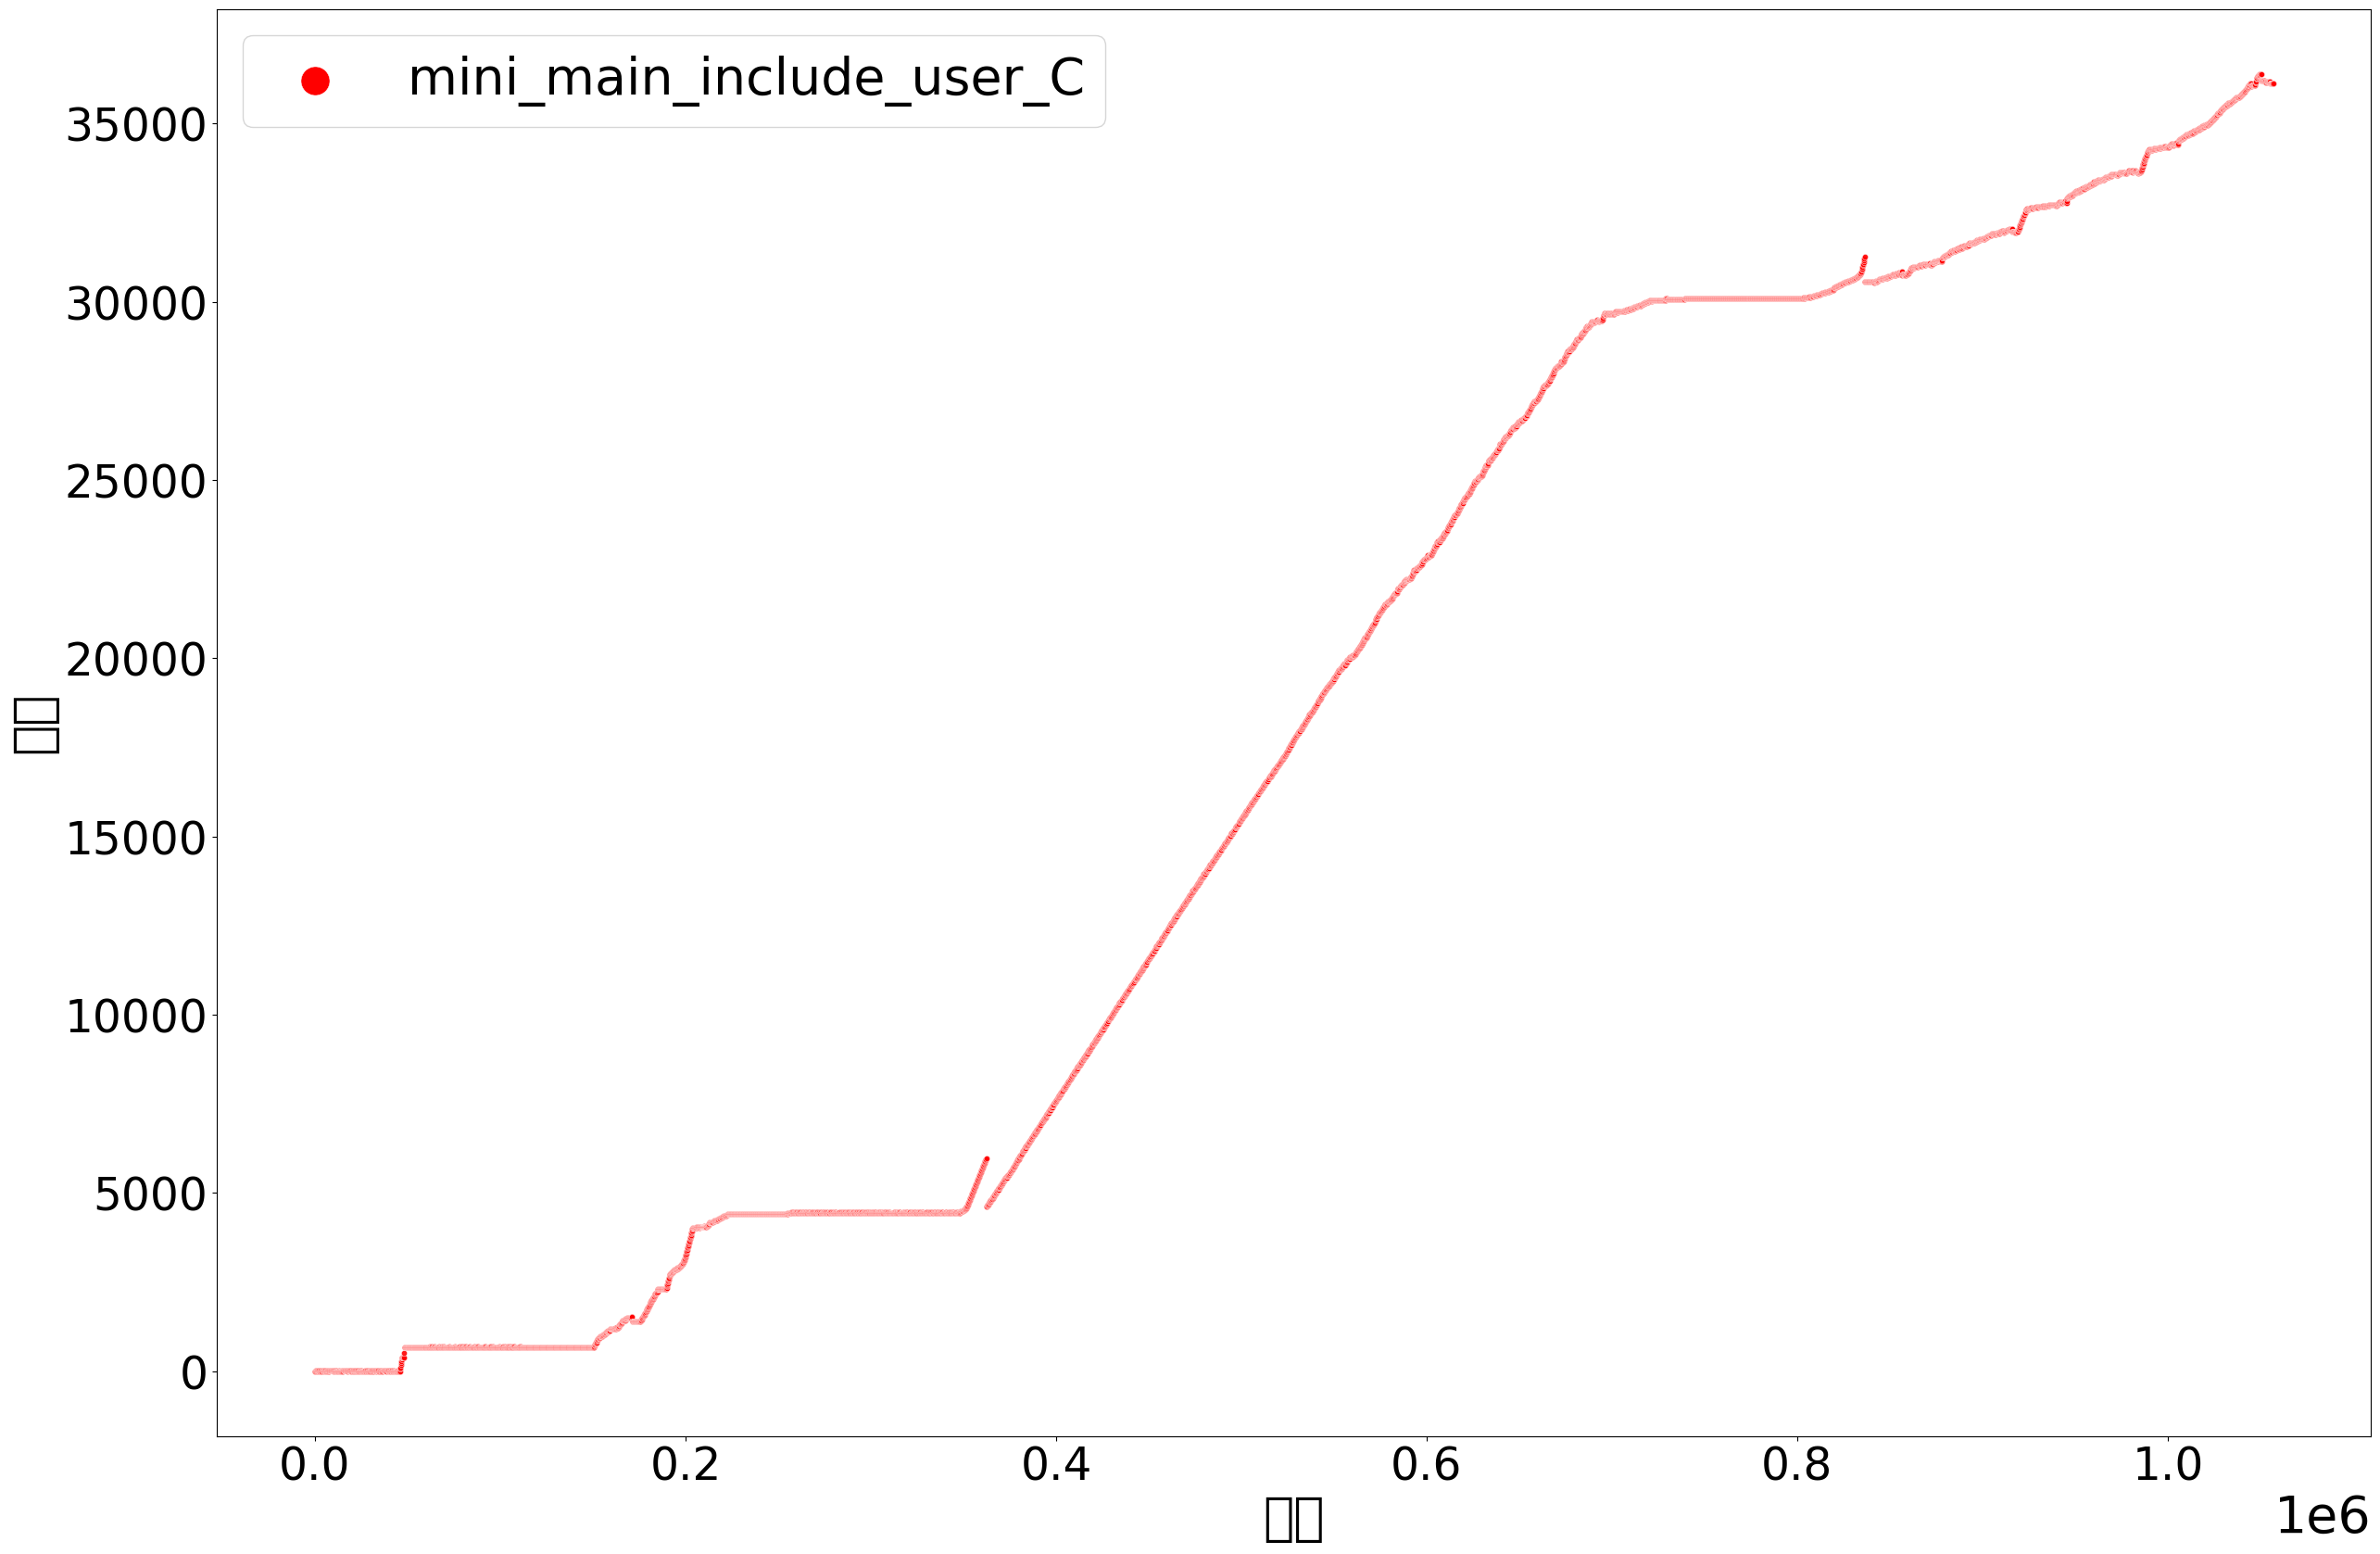

In [26]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_include_user, alpha=0.9, s=20, label='mini_main_include_user_C',color='red',ax=ax)  

inrease_g_size(g1)

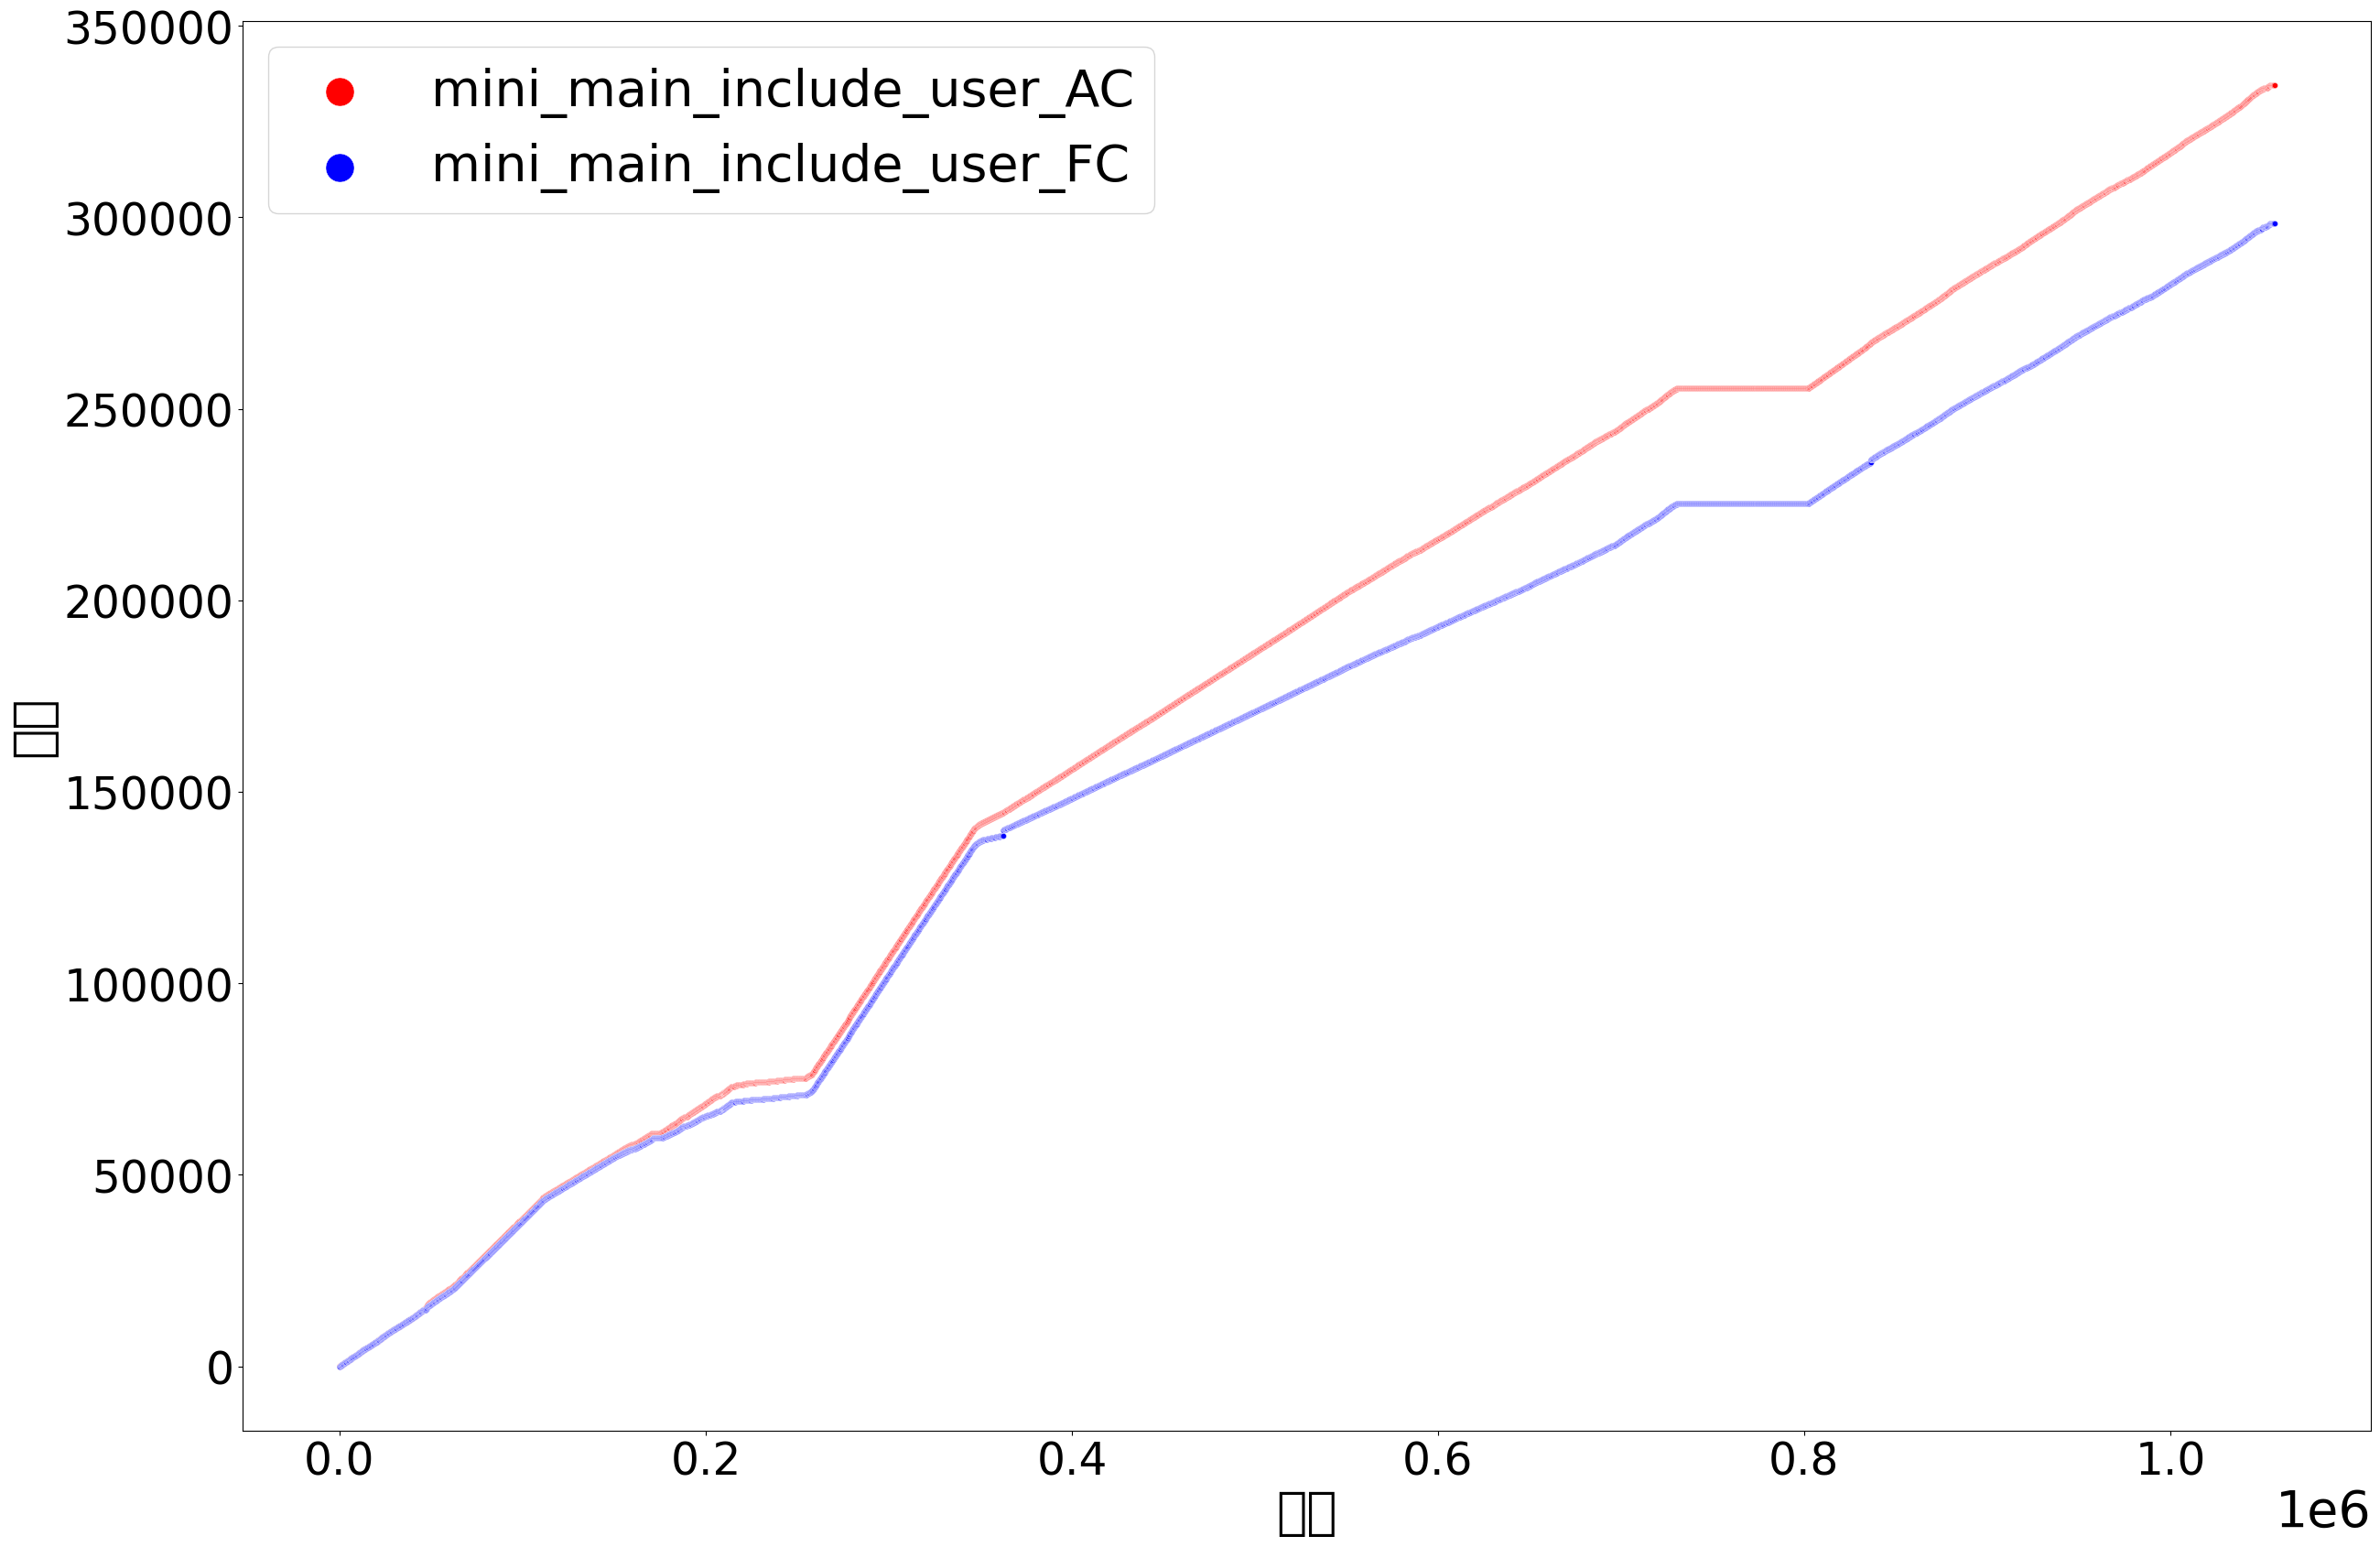

In [27]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_include_user, alpha=0.9, s=20, label='mini_main_include_user_AC',color='red',ax=ax)  
g2=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_include_user, alpha=0.9, s=20, label='mini_main_include_user_FC',color='blue',ax=ax)  

inrease_g_size(g1)
inrease_g_size(g2)

# 4.  日志比对作图 (seaborn)

##  1.    对比  栈净  作图

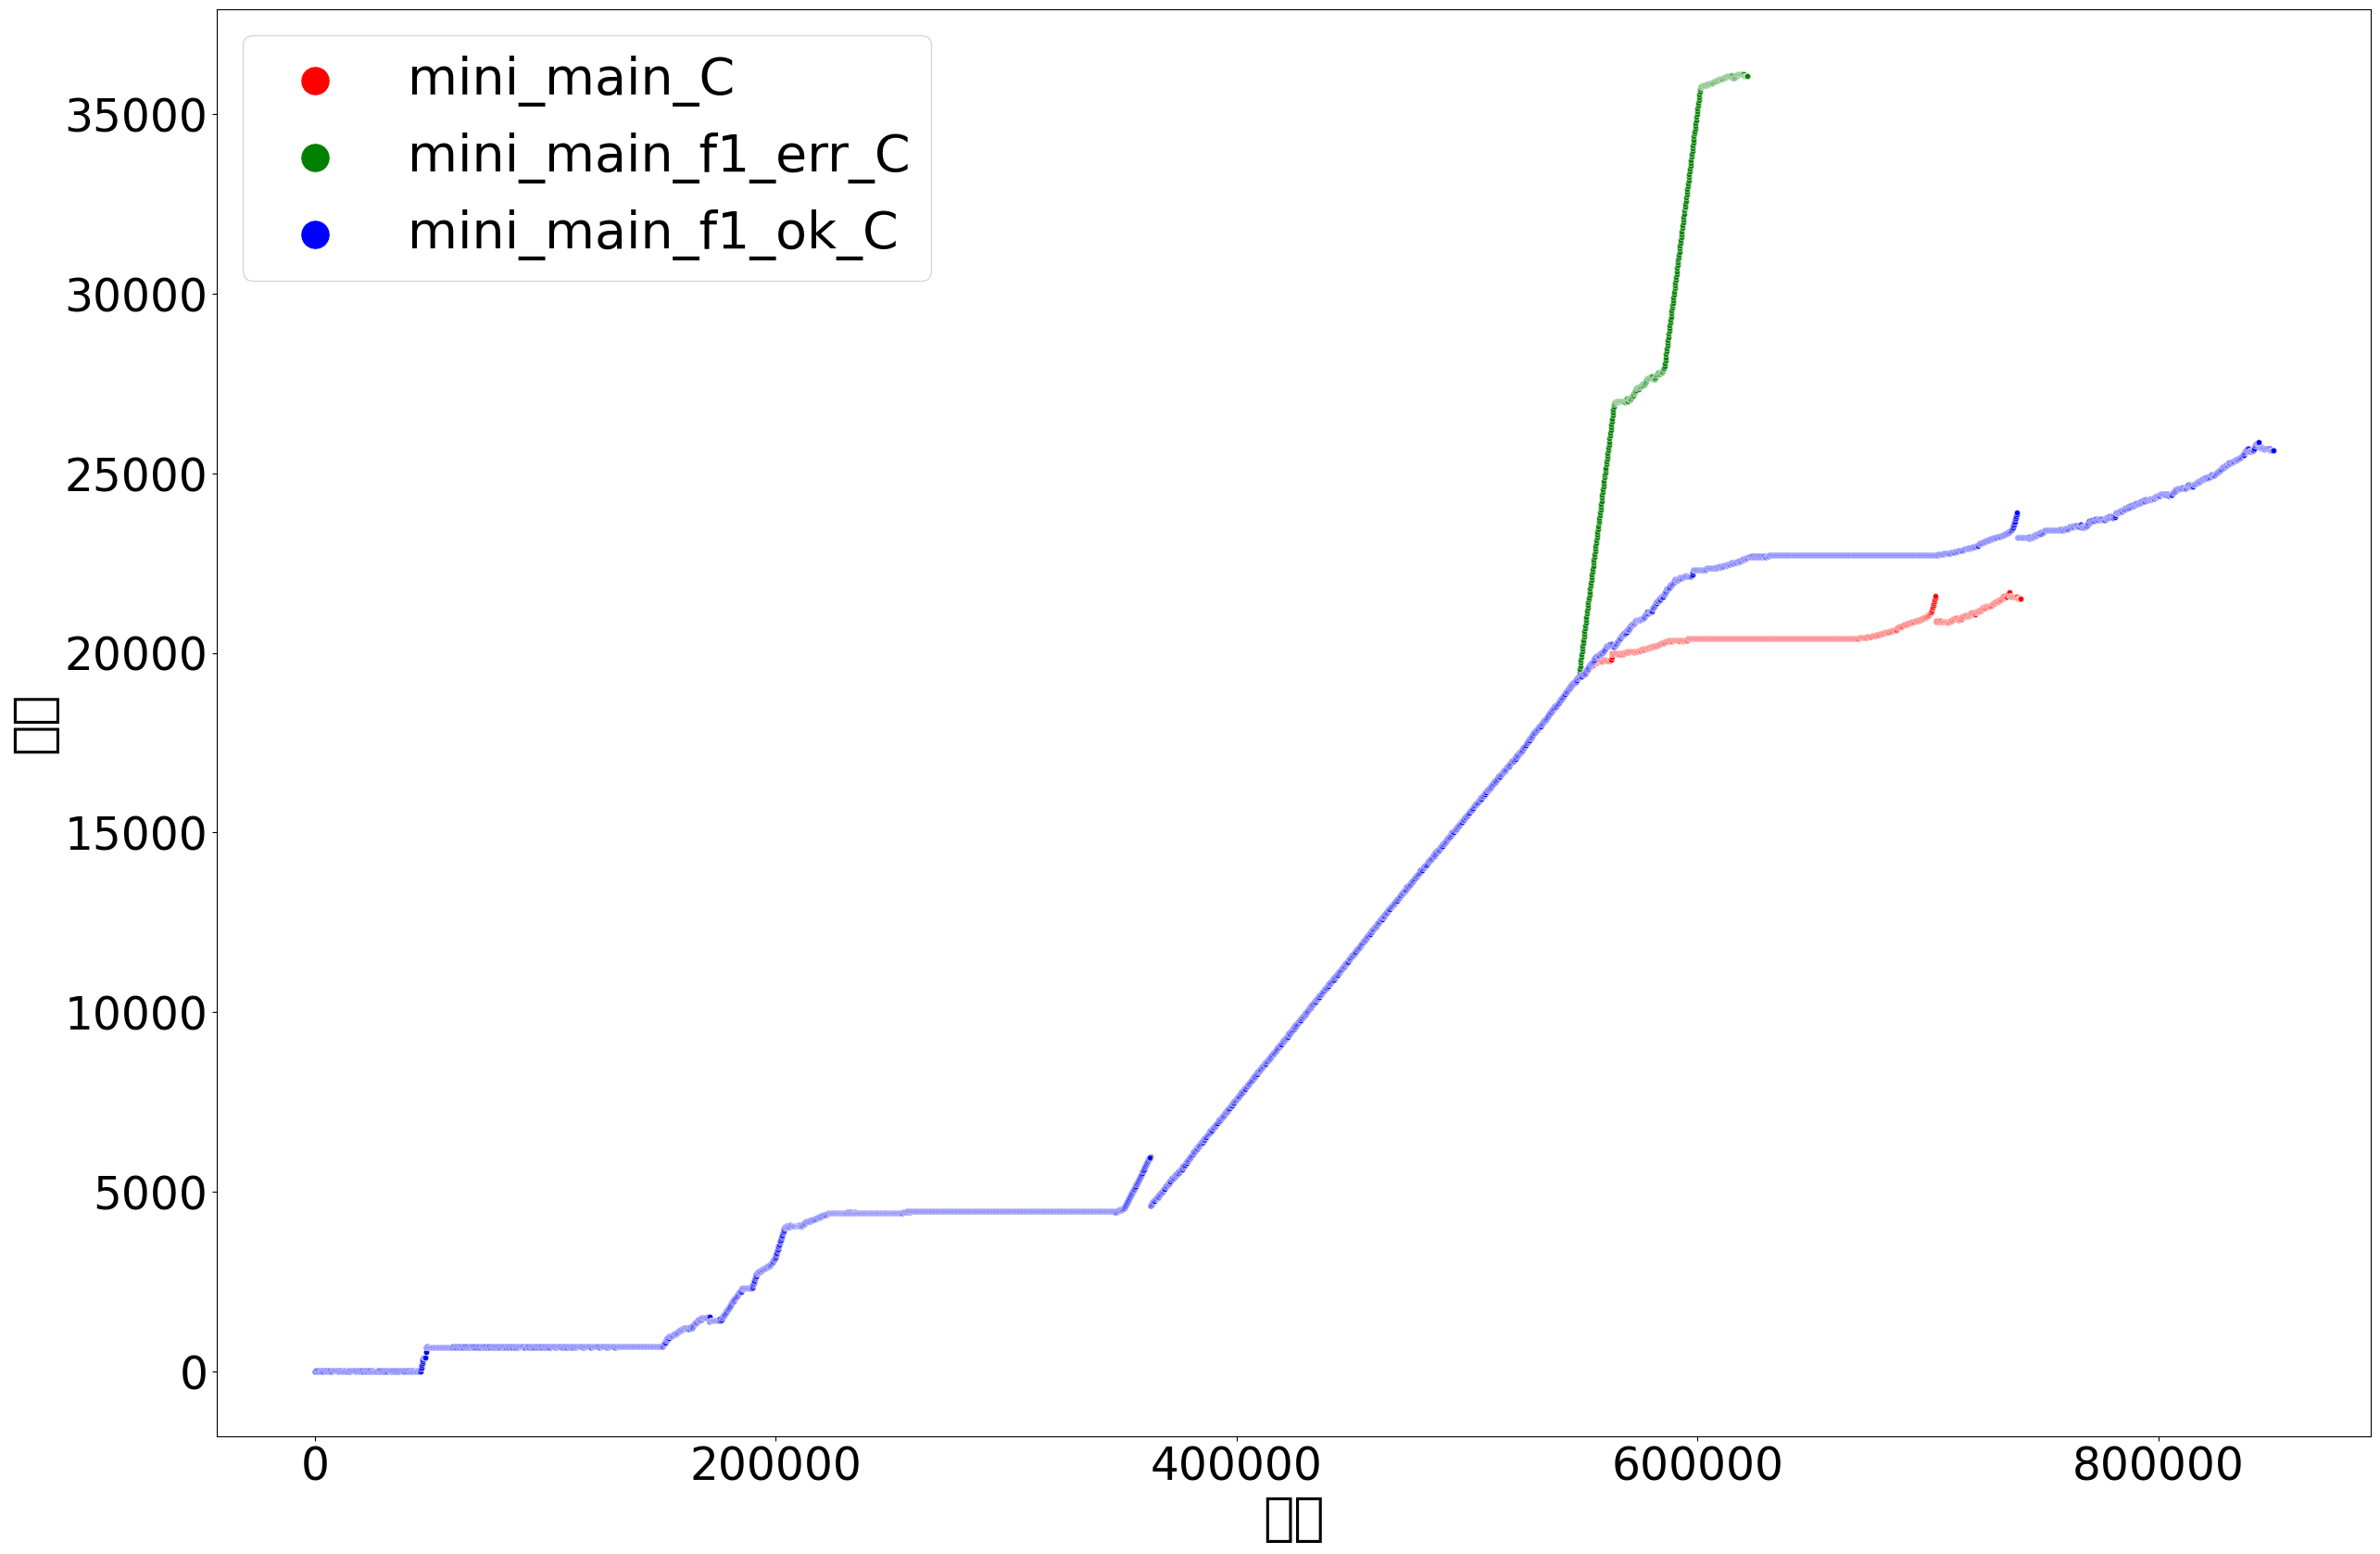

In [28]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_C',ax=ax,color='red')  
g2=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_C',ax=ax,color='green') 
g3=seaborn.scatterplot(x='滴答', y='栈净' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_C',ax=ax,color='blue')   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


##  2.    对比  栈生  作图

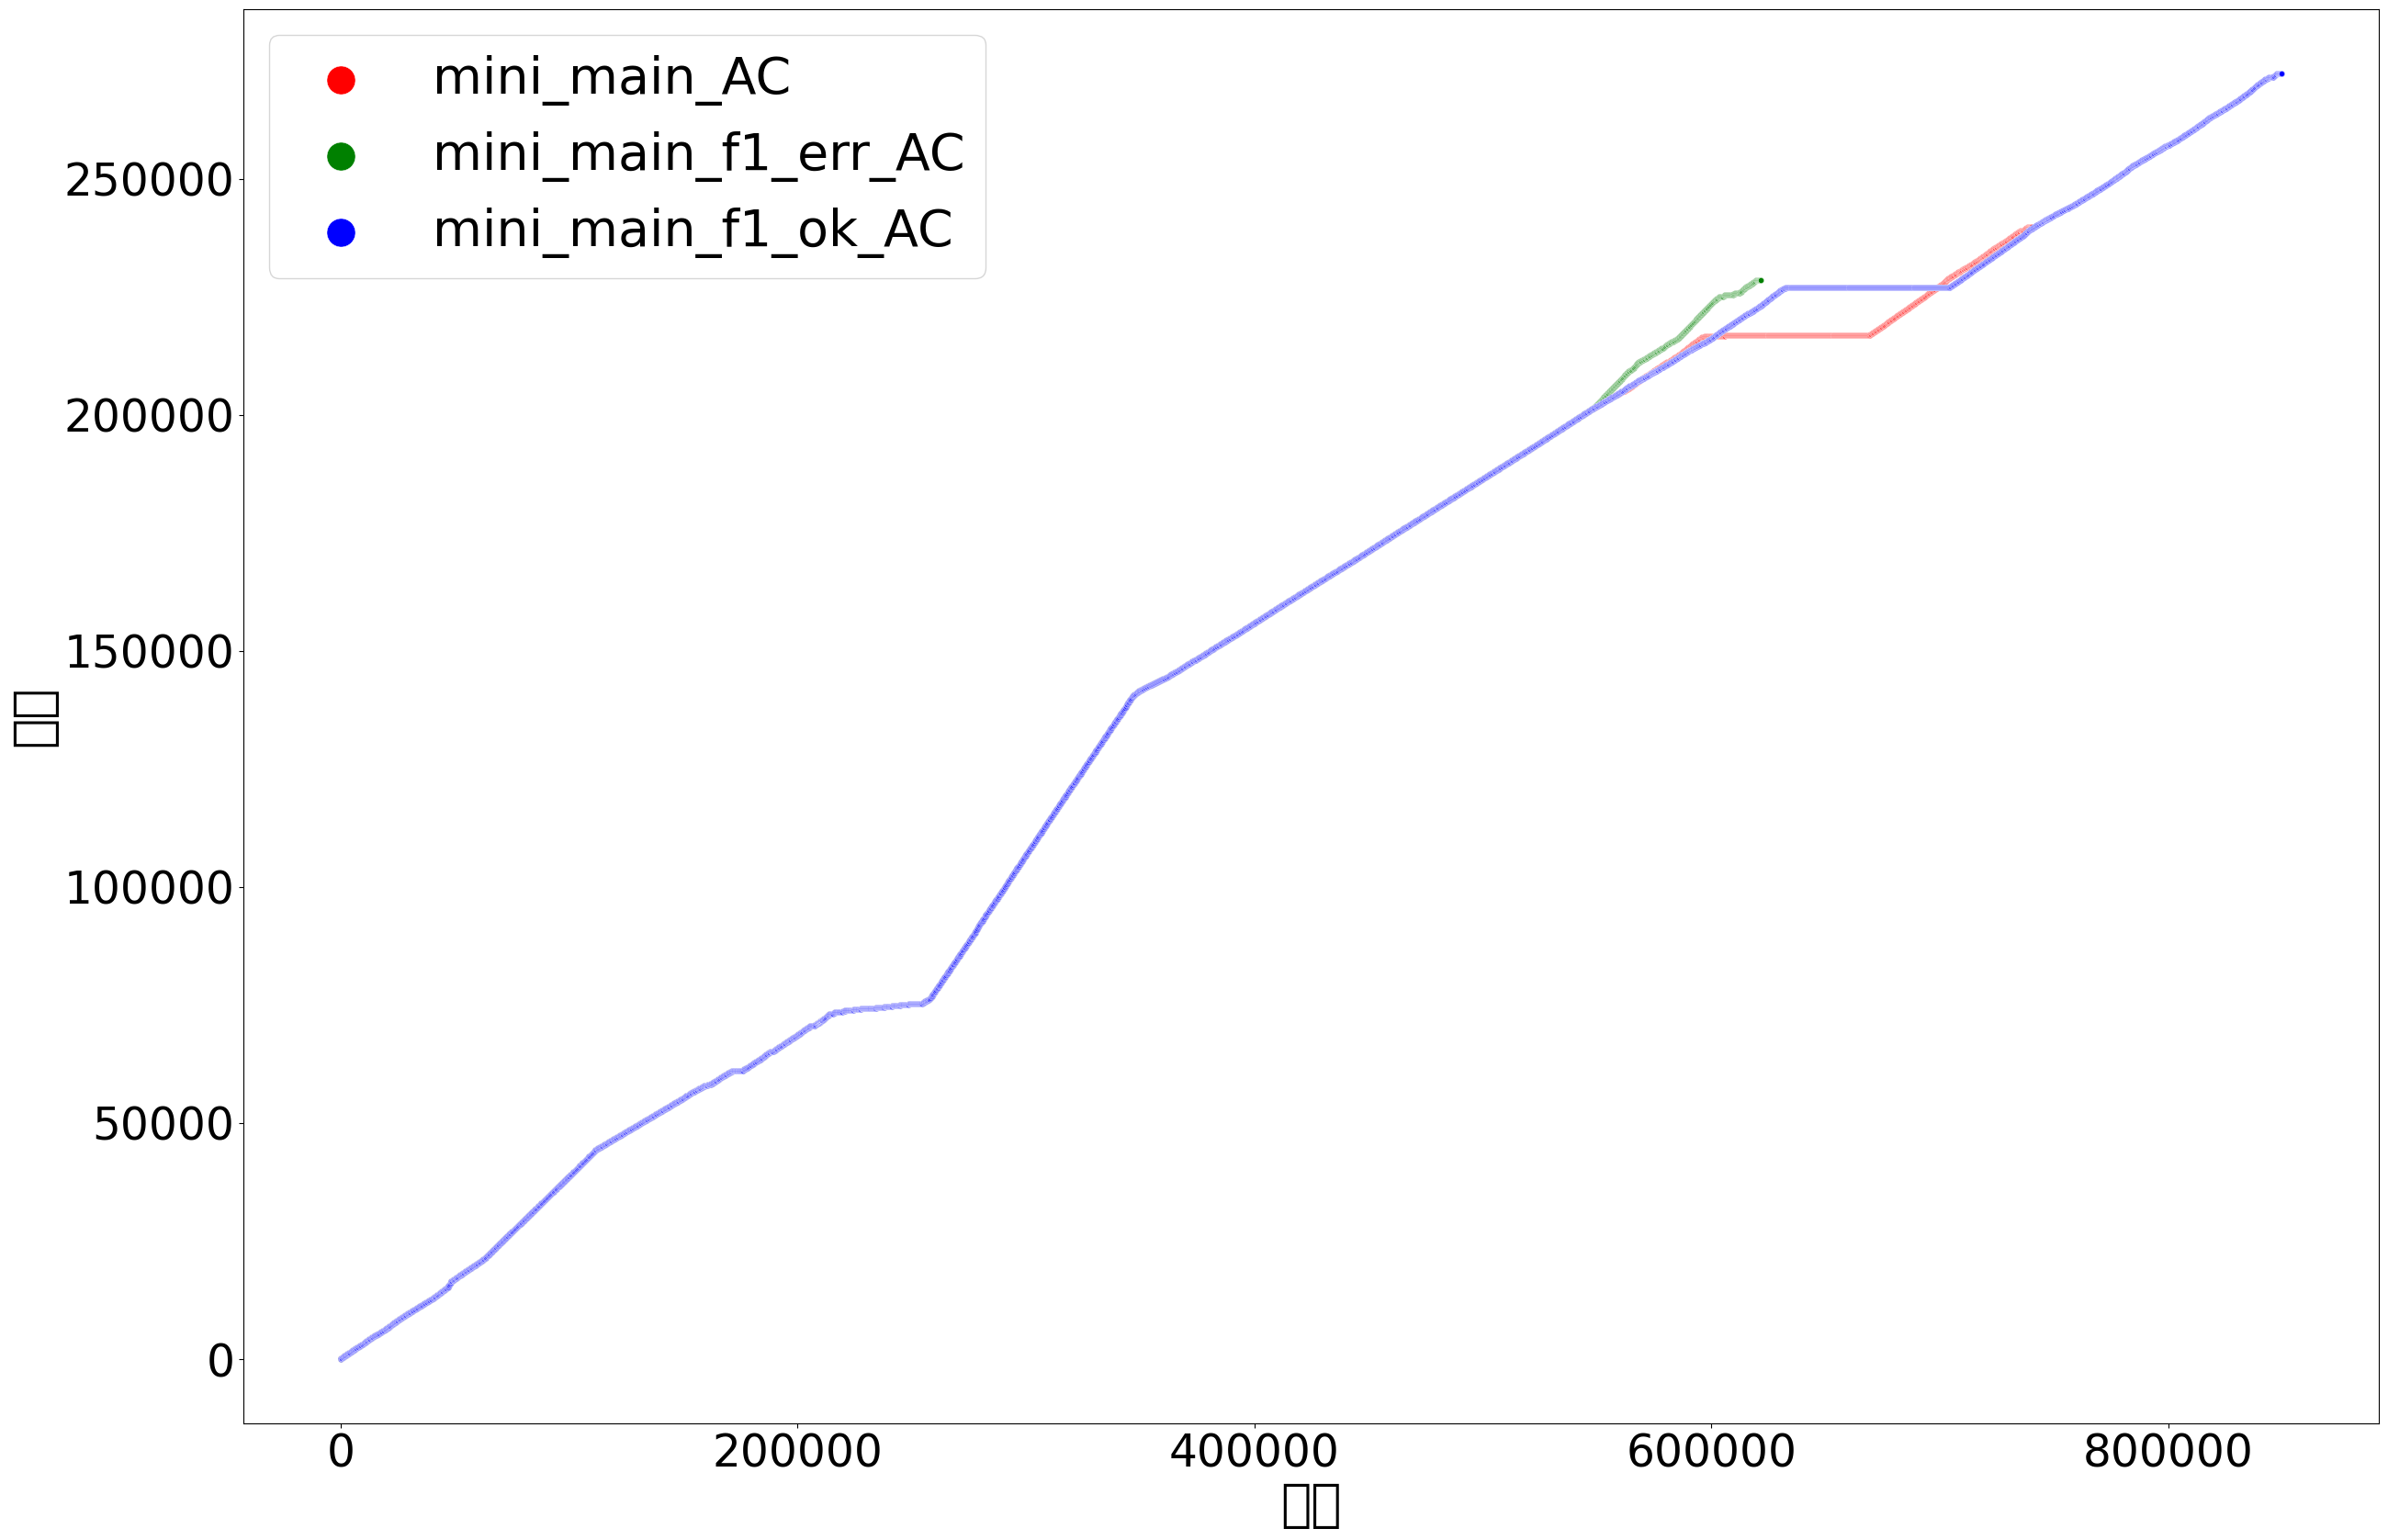

In [29]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_AC',ax=ax,color='red')  
g2=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_AC',ax=ax,color='green') 
g3=seaborn.scatterplot(x='滴答', y='栈生' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_AC',ax=ax,color='blue')   

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


##  3.    对比  栈死  作图

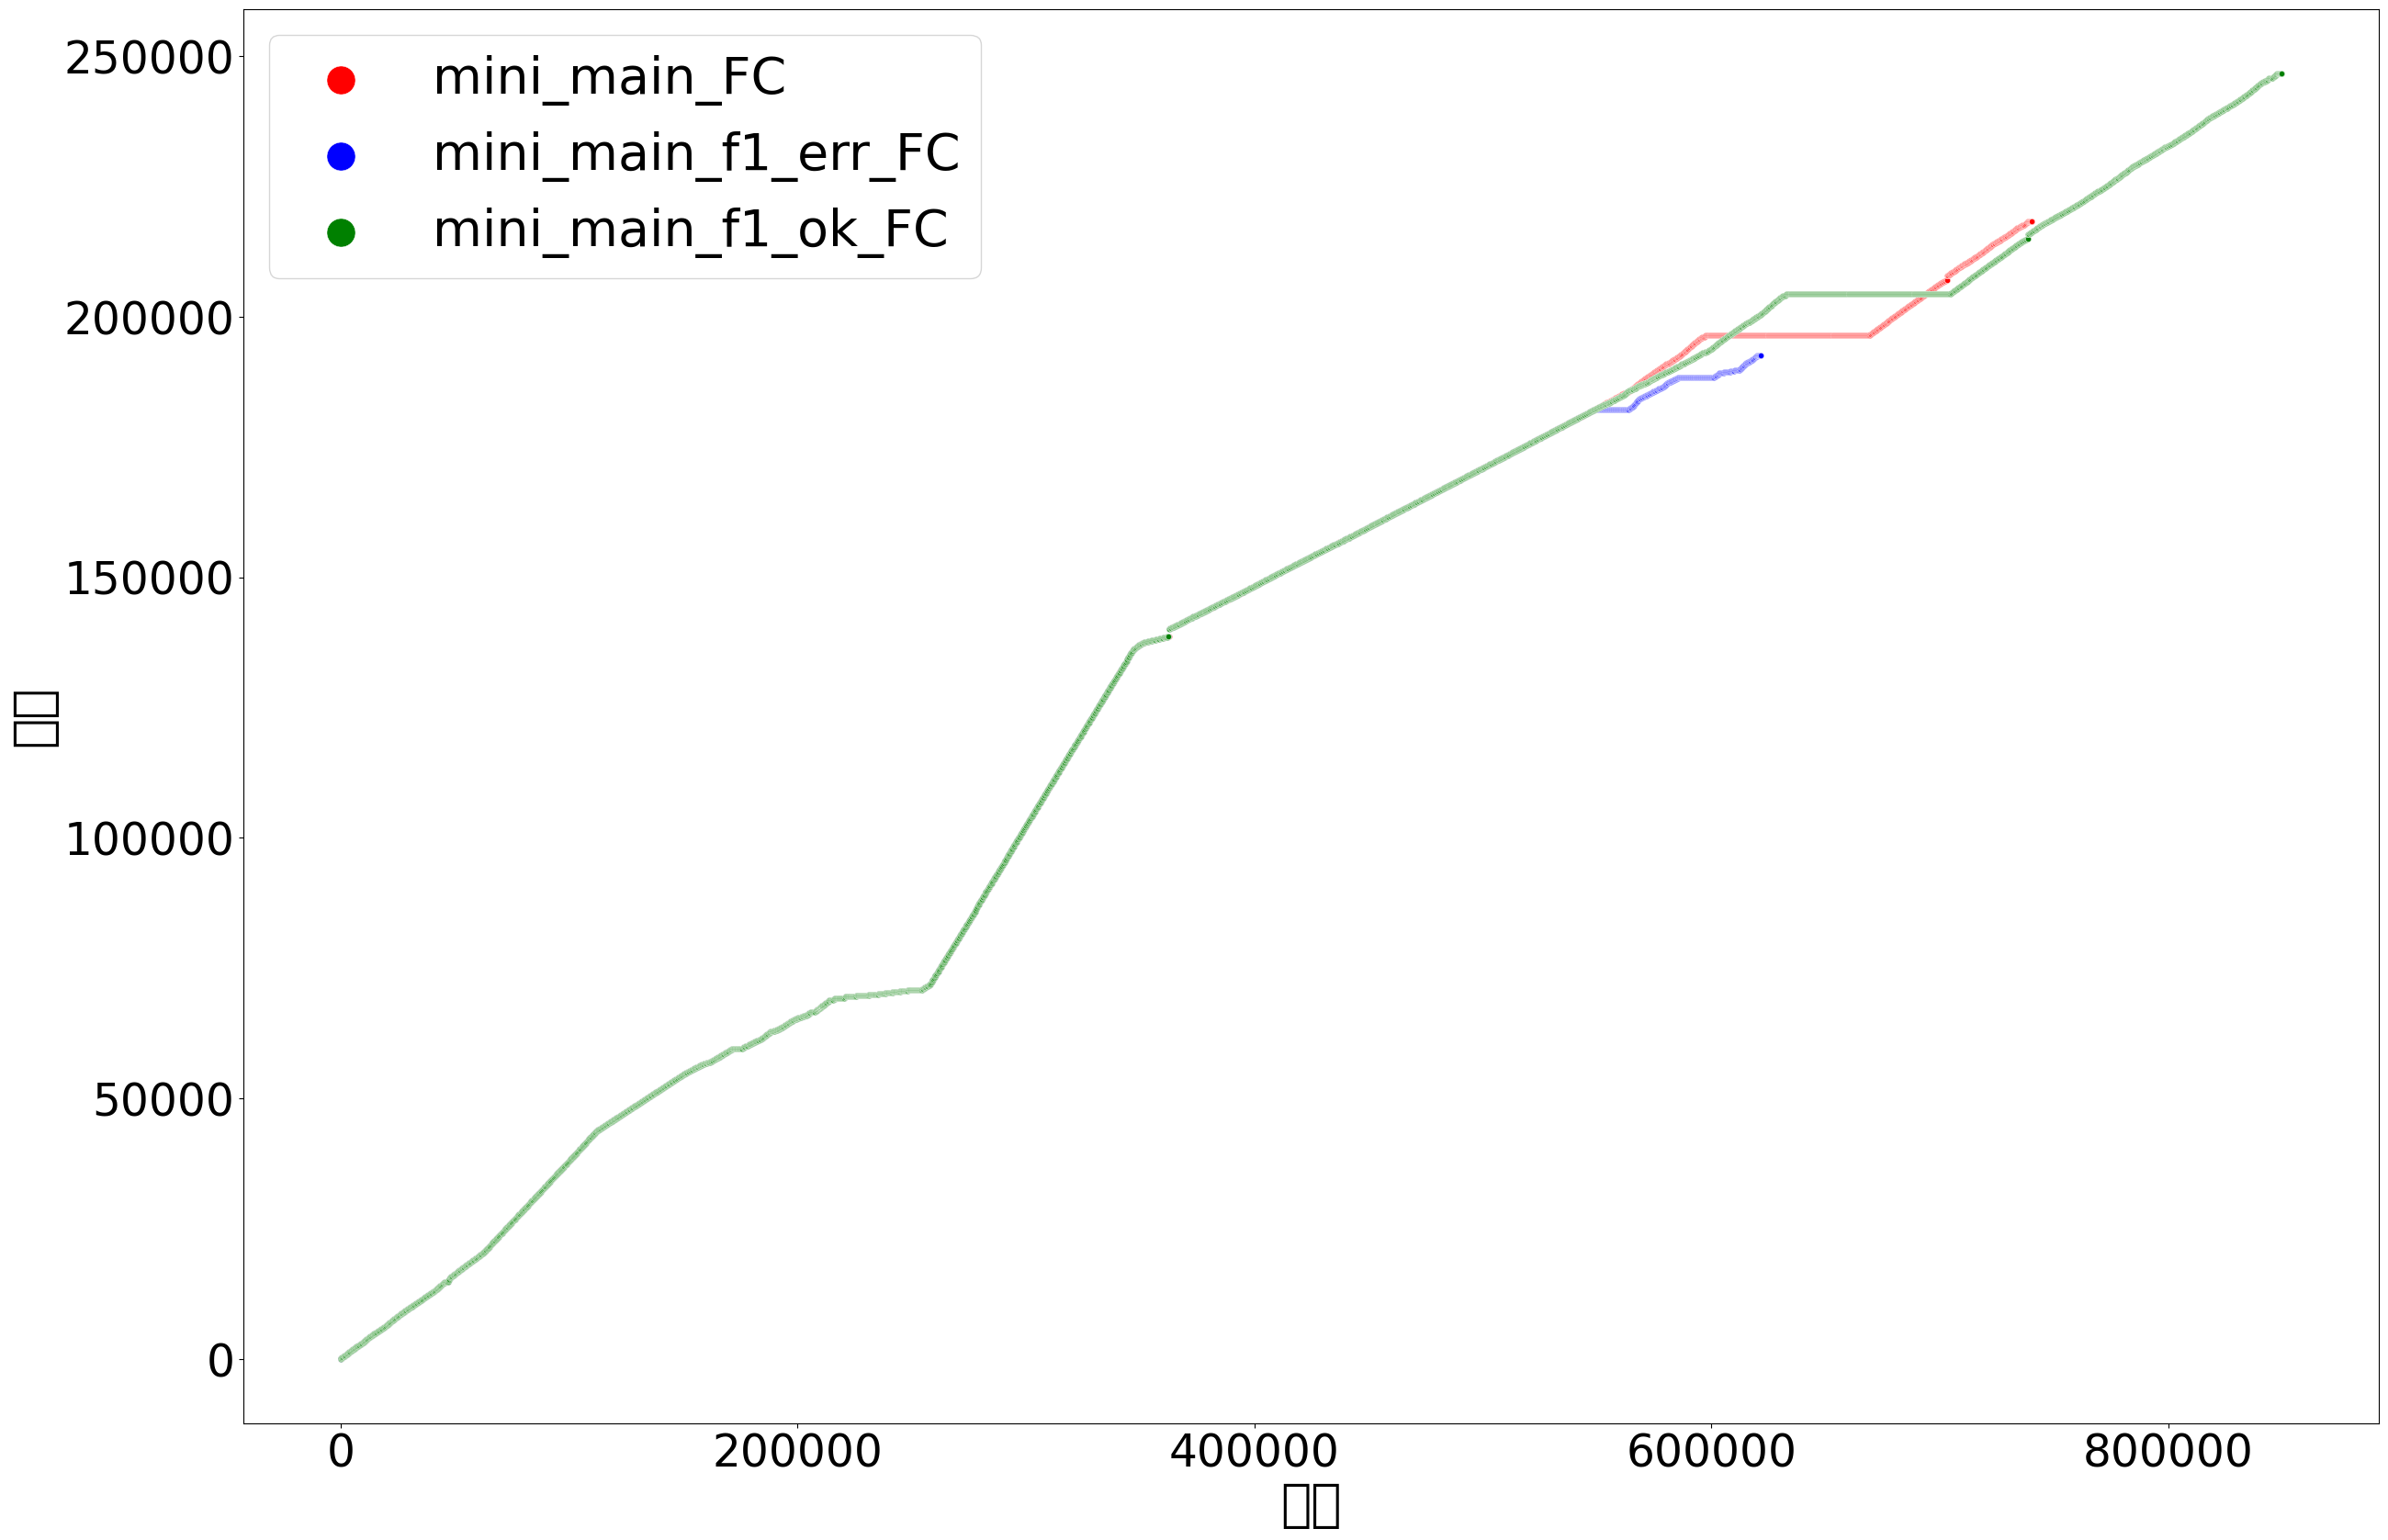

In [30]:
fig, ax = matplotlib.pyplot.subplots(figsize=(30,20))

ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=35)
matplotlib.pyplot.rcParams['font.size'] = 40

g1=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main, alpha=0.9, s=20, label='mini_main_FC',ax=ax,color='red')  
g2=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_err, alpha=0.9, s=20, label='mini_main_f1_err_FC',ax=ax,color='blue') 
g3=seaborn.scatterplot(x='滴答', y='栈死' , data=df_mini_main_f1_ok, alpha=0.9, s=20, label='mini_main_f1_ok_FC',ax=ax,color='green')  

inrease_g_size(g1)
inrease_g_size(g2)
inrease_g_size(g3)


# 5.  单日志作图 (plotly)


> plotly作图 , 结果当然是和 seaborn一样了

> plotly作图 不会留在 .ipynb文件内，但比seaborn清晰。

##  1. mini_main.c作图


In [31]:

mini_main_栈生_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈生"
)


mini_main_栈净_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈净"
)

mini_main_栈死_trace = graph_objs.Scatter(
 x = df_mini_main.滴答,
 y = df_mini_main.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_栈死,"
)





In [32]:
# #浏览器中显示:
# plotly_offline.iplot([ mini_main_栈生_trace, mini_main_栈净_trace, mini_main_栈死_trace])
# plotly_offline.iplot([ mini_main_栈生_trace, mini_main_栈死_trace])
# plotly_offline.iplot([ mini_main_栈净_trace])

##  2. mini_main_f1_err.c作图

In [33]:

mini_main_f1_err_栈生_trace = graph_objs.Scatter(
 x = df_mini_main_f1_err.滴答,
 y = df_mini_main_f1_err.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_err_栈生"
)


mini_main_f1_err_栈净_trace = graph_objs.Scatter(
 x = df_mini_main_f1_err.滴答,
 y = df_mini_main_f1_err.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_err_栈净"
)

mini_main_f1_err_栈死_trace = graph_objs.Scatter(
 x = df_mini_main_f1_err.滴答,
 y = df_mini_main_f1_err.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_err_栈死,"
)




In [34]:
# #浏览器中显示:
# plotly_offline.iplot([ mini_main_f1_err_栈生_trace, mini_main_f1_err_栈净_trace, mini_main_f1_err_栈死_trace])
# plotly_offline.iplot([ mini_main_f1_err_栈生_trace, mini_main_f1_err_栈死_trace])
# plotly_offline.iplot([ mini_main_f1_err_栈净_trace])


##  3. mini_main_f1_ok.c作图

In [35]:

mini_main_f1_ok_栈生_trace = graph_objs.Scatter(
 x = df_mini_main_f1_ok.滴答,
 y = df_mini_main_f1_ok.栈生,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_ok_栈生"
)


mini_main_f1_ok_栈净_trace = graph_objs.Scatter(
 x = df_mini_main_f1_ok.滴答,
 y = df_mini_main_f1_ok.栈净,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_ok_栈净"
)

mini_main_f1_ok_栈死_trace = graph_objs.Scatter(
 x = df_mini_main_f1_ok.滴答,
 y = df_mini_main_f1_ok.栈死,
 showlegend=True,
mode = 'markers',
marker=dict(size=2),
name="mini_main_f1_ok_栈死,"
)






In [36]:
# #浏览器中显示:
# plotly_offline.iplot([ mini_main_f1_ok_栈生_trace, mini_main_f1_ok_栈净_trace, mini_main_f1_ok_栈死_trace])
# plotly_offline.iplot([ mini_main_f1_ok_栈生_trace, mini_main_f1_ok_栈死_trace])
# plotly_offline.iplot([ mini_main_f1_ok_栈净_trace])

# 4.  日志比对作图 (seaborn)

##  1.    对比  栈净  作图

In [37]:
#浏览器:
# plotly_offline.iplot([ mini_main_栈净_trace, mini_main_f1_err_栈净_trace, mini_main_f1_ok_栈净_trace])


##  2.    对比  栈生  作图

In [38]:
#浏览器:
# plotly_offline.iplot([ mini_main_栈生_trace, mini_main_f1_err_栈生_trace, mini_main_f1_ok_栈生_trace])


##  3.    对比  栈死  作图

In [39]:
#浏览器:
# plotly_offline.iplot([ mini_main_栈死_trace, mini_main_f1_err_栈死_trace, mini_main_f1_ok_栈死_trace])
